In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
rrr = [0,1,3,4,]

        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("qtot", np.float32),
        ("qoth", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4))
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),
        ("hese_old", hese_dtype),
        ("hese", hese_dtype),
        ("weight", weight_dtype)

In [ ]:
data_m = []
for file in glob.glob('/home/dup193/work/double_pulse/data/new_vars/Images_NuMu_1_1_1?_*'):
    x = np.load(file, mmap_mode="r")['arr_0']
    print(file, x.shape)
    for i in x:
        data_m.append(i)
data_m = np.array(data_m)
print(data_m.shape)

In [68]:
data_t = np.load('/fastio2/dasha/double_pulse/data_NuTau_1_1_.npy', mmap_mode="r")
data_m = np.load('/fastio2/dasha/double_pulse/data_NuMu_1_1_.npy', mmap_mode="r")
data_e = np.load('/fastio2/dasha/double_pulse/data_NuE_1_1_.npy', mmap_mode="r")

In [69]:
print(data_t[data_t['id']['event_id']==680]['id'])

[(118, 4294967295, 680, 0) (110, 4294967295, 680, 0)
 (117, 4294967295, 680, 0) (114, 4294967295, 680, 0)
 (149, 4294967295, 680, 0) (122, 4294967295, 680, 0)
 (128, 4294967295, 680, 0) (167, 4294967295, 680, 0)
 (165, 4294967295, 680, 0) (161, 4294967295, 680, 0)
 (153, 4294967295, 680, 0) (137, 4294967295, 680, 0)
 (135, 4294967295, 680, 0)]


In [70]:
print(data_t['map']['hlc'])
print(data_m['map']['hlc'])
print(data_e['map']['hlc'])

[ 62  86 174 ...  59  97 150]
[367  40 387 ...  92  90 504]
[ 86  96  49 ...  43  10 143]


In [77]:
def GetRates3(Name,cut1,cut2,net1,net2,sign1,sign2):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2)
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2)
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2)
     
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2)
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
 


In [78]:
def GetRatesCut(Name,cut1,cut2,net1,net2,sign1,sign2,mask1,mask2,mask3):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2) & mask1
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2) & mask2
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2) & mask3
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2) & mask1
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2) & mask2
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2) & mask3
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2) & mask1
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2) & mask2
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2) & mask3
     
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2) & mask1
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2) & mask2
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2) & mask3
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
 

In [64]:
cut1 =0.99
cut2 = 0.7
cut_ll = -1
cut_r = 0.2
mask_t = (data_t['preds']["n1"] >= cut1) & (data_t['preds']['n4'] >= cut2)
mask_m = (data_m['preds']['n1'] >= cut1) & (data_m['preds']['n4'] >= cut2)
mask_e = (data_e['preds']['n1'] >= cut1) & (data_e['preds']['n4'] >= cut2)

mask_lt =  (data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'] >= cut_ll)
mask_lm =  (data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'] >= cut_ll)
mask_le =  (data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'] >= cut_ll)

mask_rt = (data_t['ti'][:,1] >= cut_r)
mask_rm = (data_m['ti'][:,1] >= cut_r)
mask_re = (data_e['ti'][:,1] >= cut_r)

mask_rts = mask_t & mask_rt
mask_rms = mask_m & mask_rm
mask_res = mask_e & mask_re

mask_lts = mask_t & mask_lt
mask_lms = mask_m & mask_lm
mask_les = mask_e & mask_le

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


In [88]:
print(data_t[(data_t['id']['event_id']==680) & (data_t['id']['run_id']==153)]['weight_val'])
print(data_t[(data_t['id']['event_id']==680) & (data_t['id']['run_id']==153)]['preds']['n1'])
print(data_t[(data_t['id']['event_id']==680) & (data_t['id']['run_id']==153)]['preds']['n4'])


[0.01385675]
[0.8072451]
[0.5888432]


In [79]:
GetRates3("Rates after NET1 and NET3",0.99,0.7,"n1","n4","more","more")
GetRatesCut("Rates after NET1 and NET3 + ll cut",0.99,0.7,"n1","n4","more","more",mask_lt,mask_lm,mask_le)
GetRatesCut("Rates after NET1 and NET3 + ratio cut",0.99,0.7,"n1","n4","more","more",mask_rt,mask_rm,mask_re)
GetRatesCut("Rates after NET1 and NET3 + both cut",0.99,0.7,"n1","n4","more","more",mask_rt & mask_lt,mask_rm & mask_lm,mask_re & mask_le)


Rates after NET1 and NET3
NuTauCC = 0.379 +/- 0.026
NuMuCC =  0.114 +/- 0.021
NuECC =   0.005 +/- 0.004
Rates after NET1 and NET3 + ll cut
NuTauCC = 0.373 +/- 0.026
NuMuCC =  0.030 +/- 0.007
NuECC =   0.005 +/- 0.004
Rates after NET1 and NET3 + ratio cut
NuTauCC = 0.364 +/- 0.026
NuMuCC =  0.035 +/- 0.008
NuECC =   0.005 +/- 0.004
Rates after NET1 and NET3 + both cut
NuTauCC = 0.360 +/- 0.026
NuMuCC =  0.023 +/- 0.007
NuECC =   0.005 +/- 0.004


In [8]:
def Plot(Name,Label,data_t,data_m,data_e,xscale='linear',b =100,r =[0,1000], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(121)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
   
    #ax.set_xscale(xscale)
    #ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.74,'#EventsT '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.84,'#EventsM '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.94,'#EventsE '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_t, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m, bins =b, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "NuMuCC")  
    ax.hist(data_e, bins =b, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "NuECC")  
    
    ax2 = fig.add_subplot(122)
    weights_t = np.ones(data_t.shape[0])/data_t.shape[0]
    weights_m = np.ones(data_m.shape[0])/data_m.shape[0]
    weights_e = np.ones(data_e.shape[0])/data_e.shape[0]

    #ax.set_xscale(xscale)
    #ax.set_yscale('log')
    ax2.set_title(Name, fontsize = 16)
    ax2.text(0.01,0.74,'#EventsT '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax2.text(0.01,0.84,'#EventsM '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
    ax2.text(0.01,0.94,'#EventsE '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)

    ax2.set_xlabel(Label, fontsize = 16)                                                              
    ax2.set_ylabel("#Frequency", fontsize = 16)                                                   
    ax2.hist(data_t, bins =b, weights = weights_t, histtype = 'step',edgecolor ='r',ls = '-', lw =2, range =r, label = "NuTauCC")  
    ax2.hist(data_m, bins =b, weights = weights_m, histtype = 'step',edgecolor ='b',ls = '-', lw =2, range =r, label = "NuMuCC")  
    ax2.hist(data_e, bins =b, weights = weights_e, histtype = 'step',edgecolor ='g',ls = '-', lw =2, range =r, label = "NuECC")  
    
    plt.legend()
    plt.show()


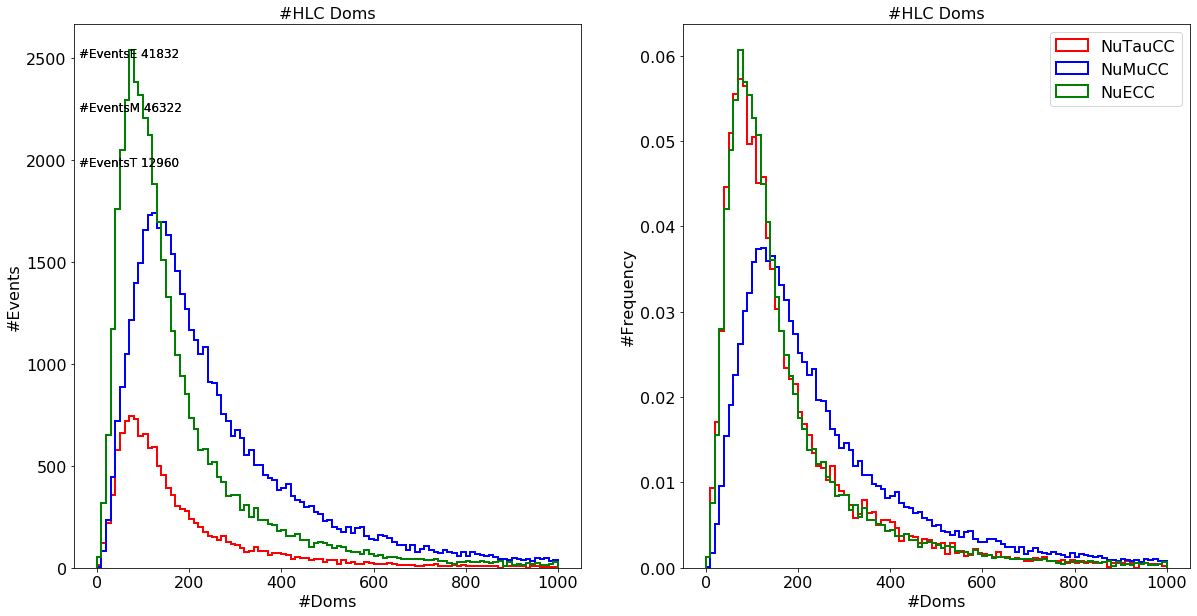

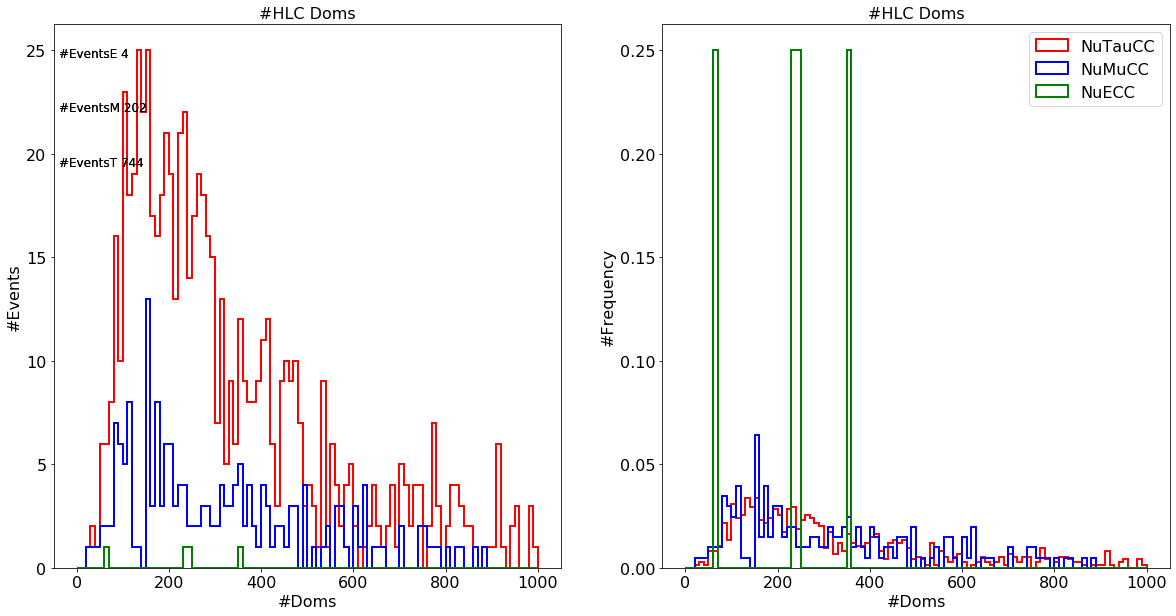

In [197]:
Plot("#HLC Doms","#Doms",data_t['map']['hlc'],data_m['map']['hlc'],data_e['map']['hlc'])
Plot("#HLC Doms","#Doms",data_t[mask_t]['map']['hlc'],data_m[mask_m]['map']['hlc'],data_e[mask_e]['map']['hlc'])

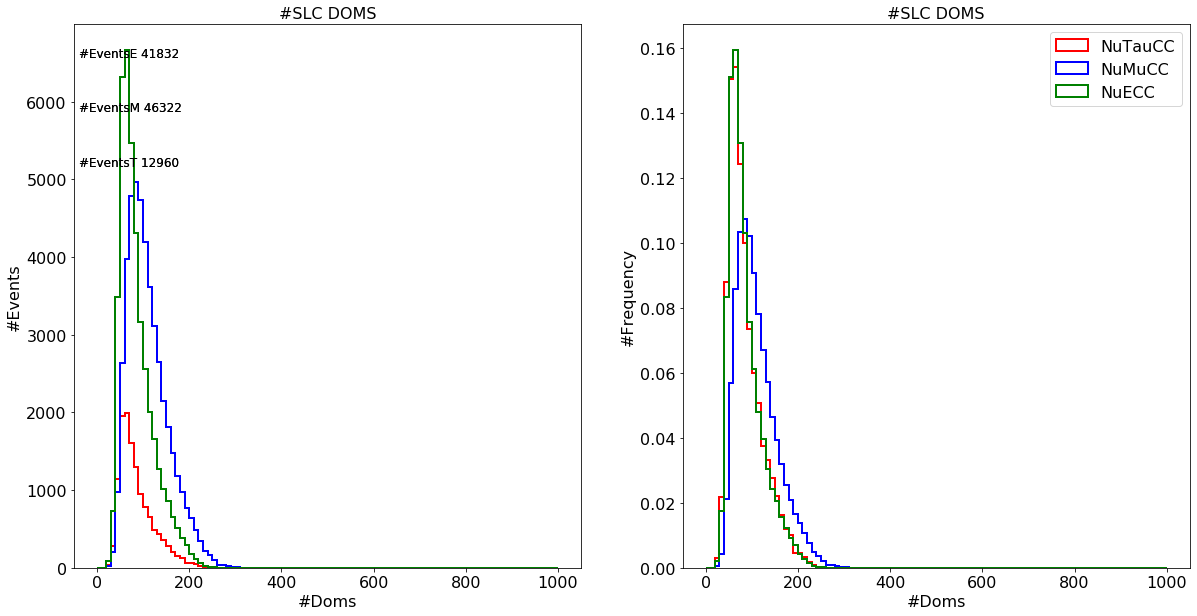

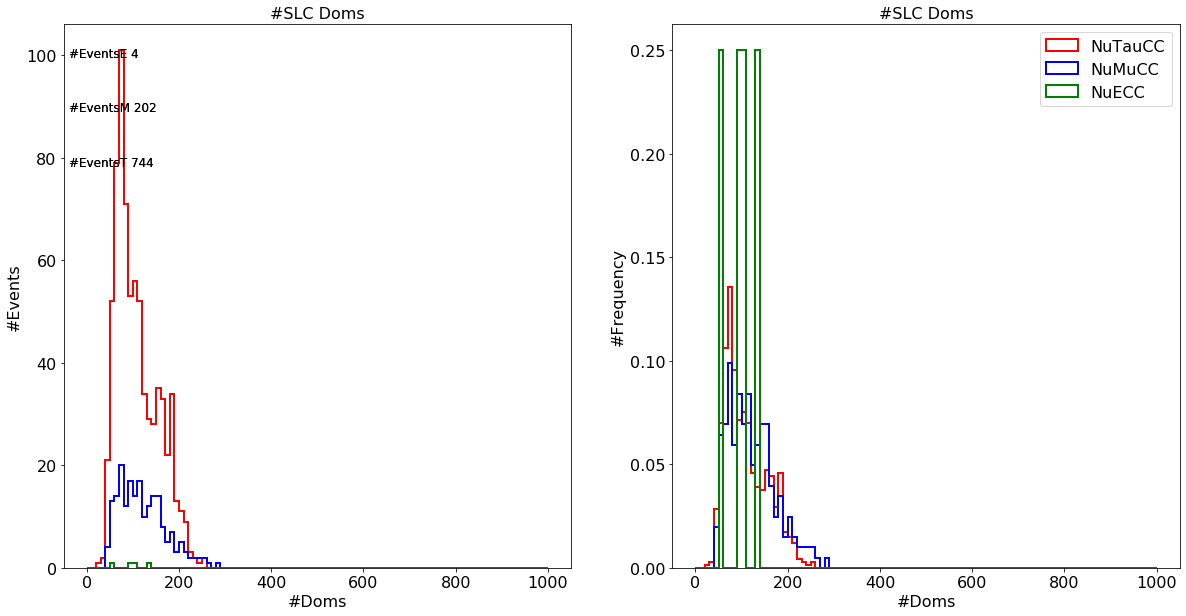

In [198]:
Plot("#SLC DOMS","#Doms",data_t['map']['slc'],data_m['map']['slc'],data_e['map']['slc'])
Plot("#SLC Doms","#Doms",data_t[mask_t]['map']['slc'],data_m[mask_m]['map']['slc'],data_e[mask_e]['map']['slc'])

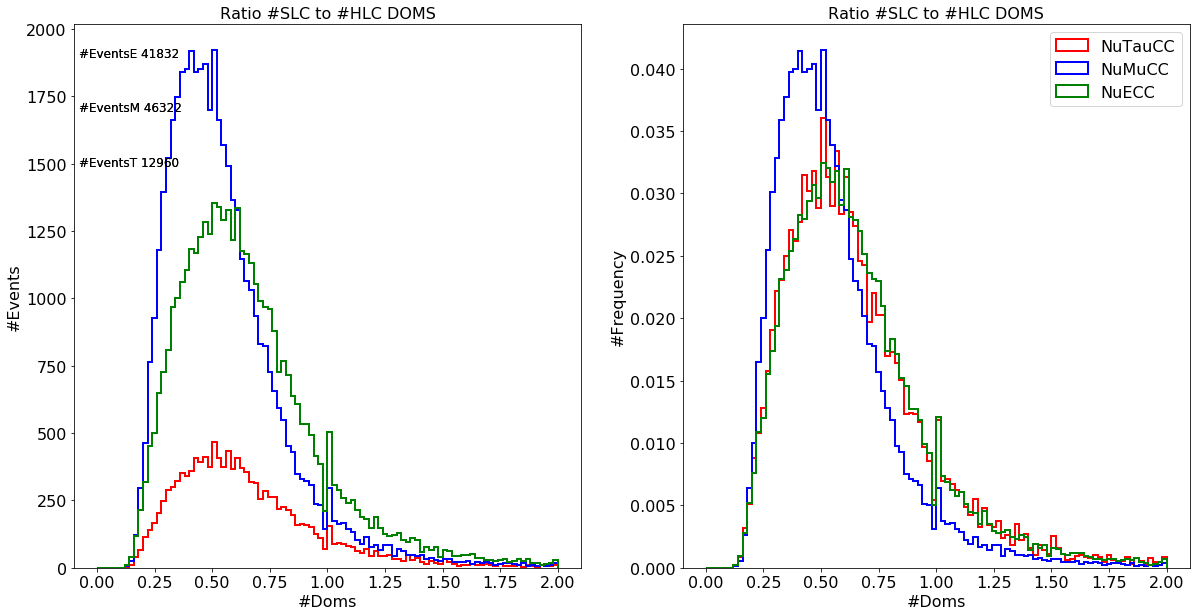

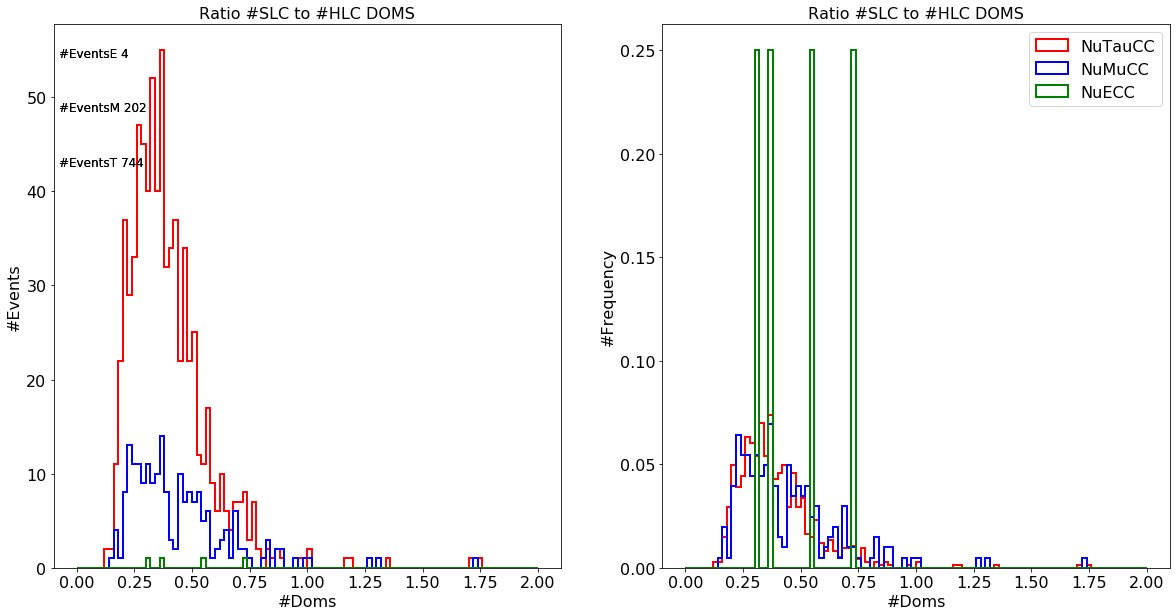

In [199]:
Plot("Ratio #SLC to #HLC DOMS","#Doms",data_t['map']['slc']/data_t['map']['hlc'],data_m['map']['slc']/data_m['map']['hlc'],data_e['map']['slc']/data_e['map']['hlc'], r=[0,2])
Plot("Ratio #SLC to #HLC DOMS","#Doms",data_t[mask_t]['map']['slc']/data_t[mask_t]['map']['hlc'],data_m[mask_m]['map']['slc']/data_m[mask_m]['map']['hlc'],data_e[mask_e]['map']['slc']/data_e[mask_e]['map']['hlc'], r=[0,2])

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


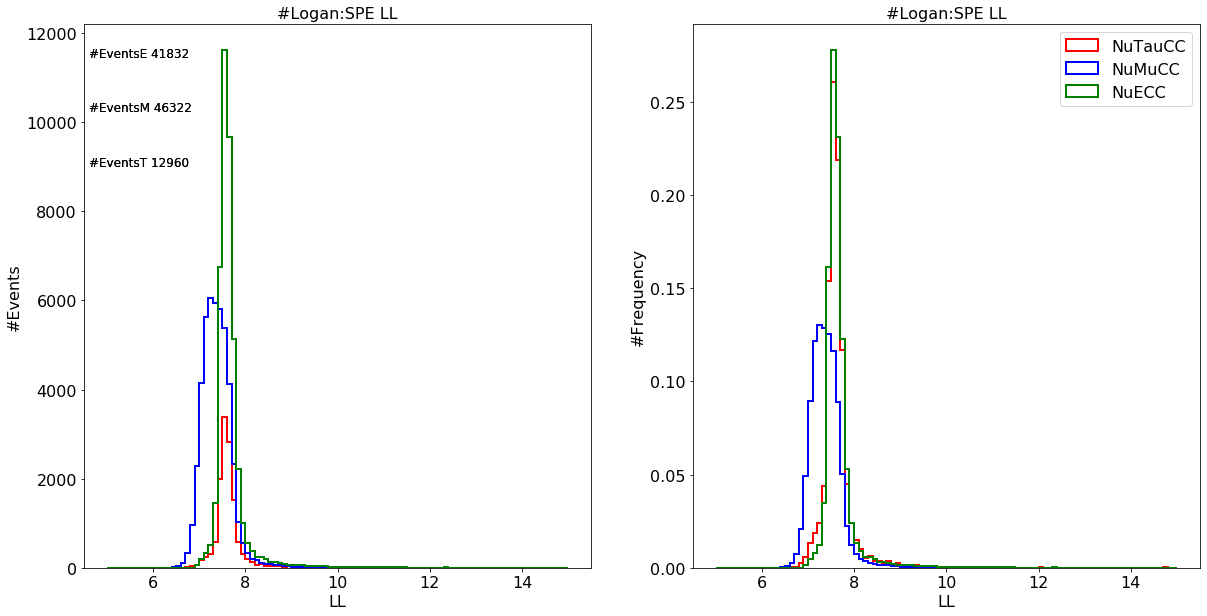

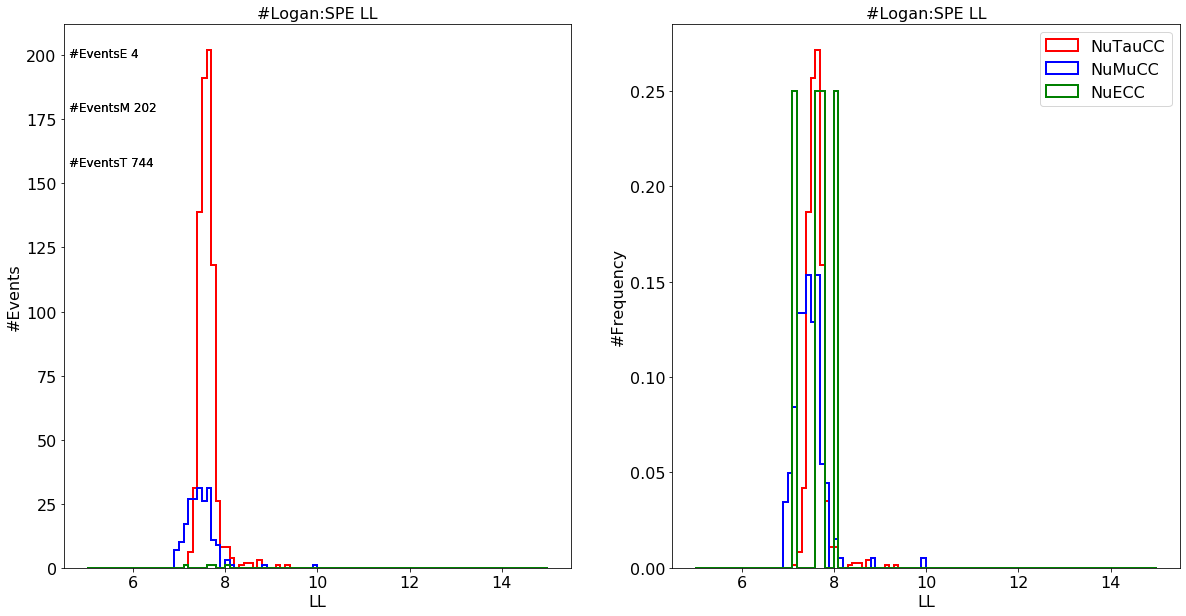

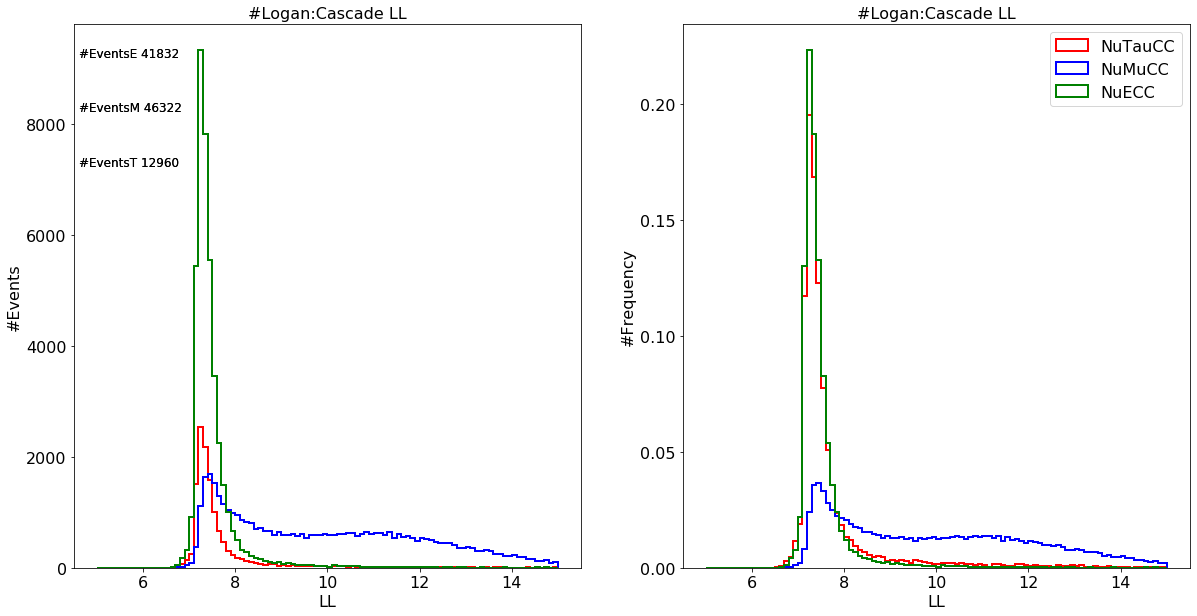

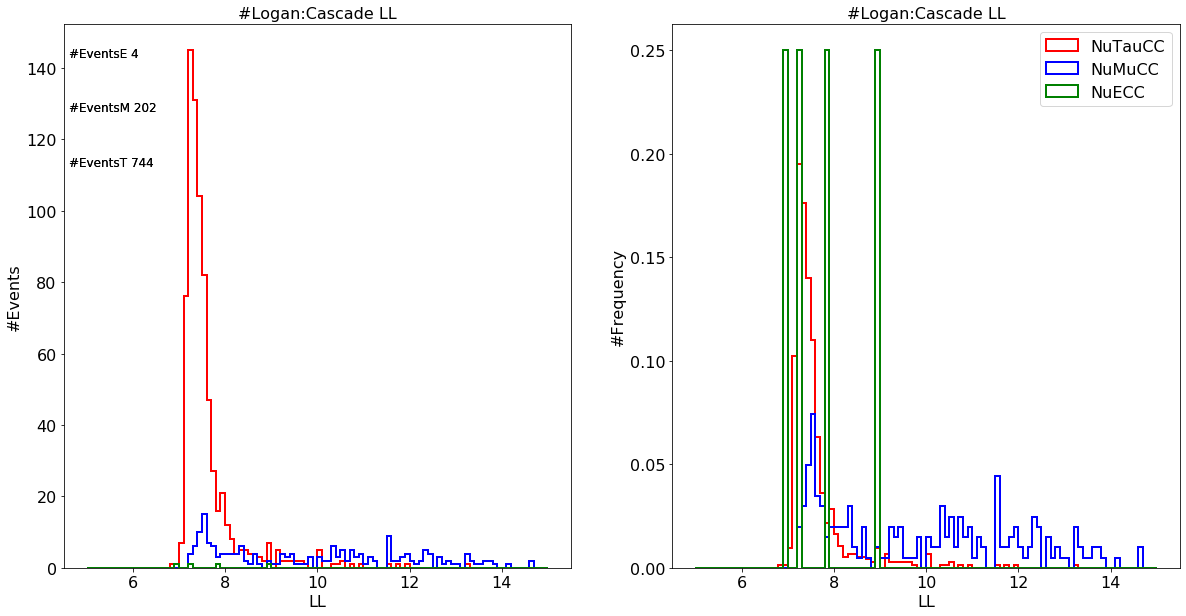

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


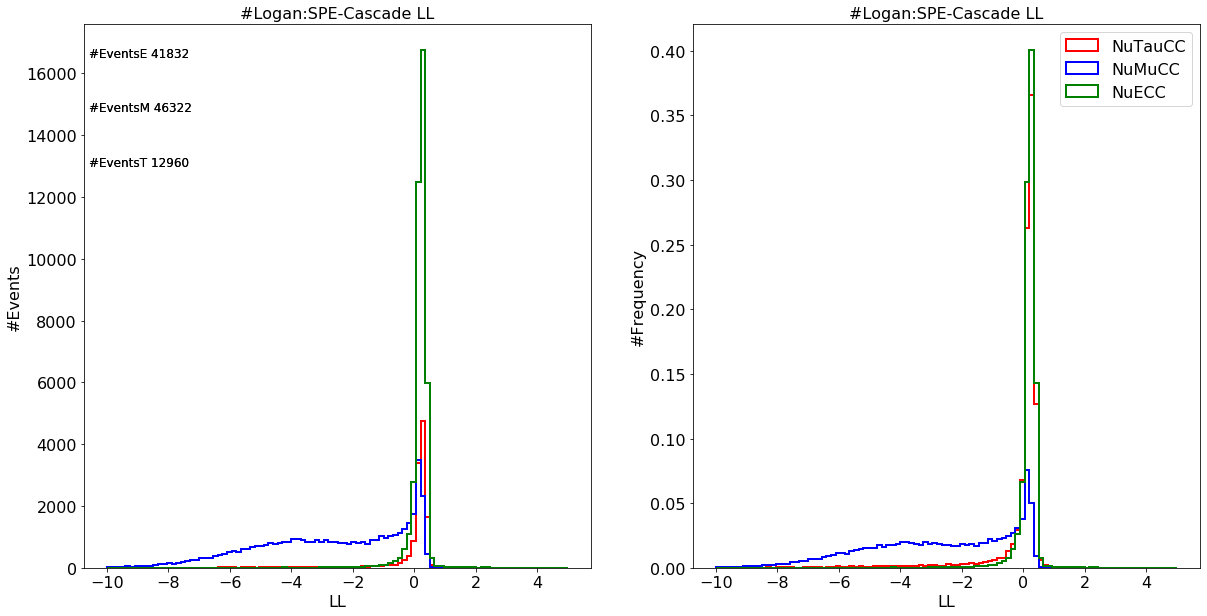

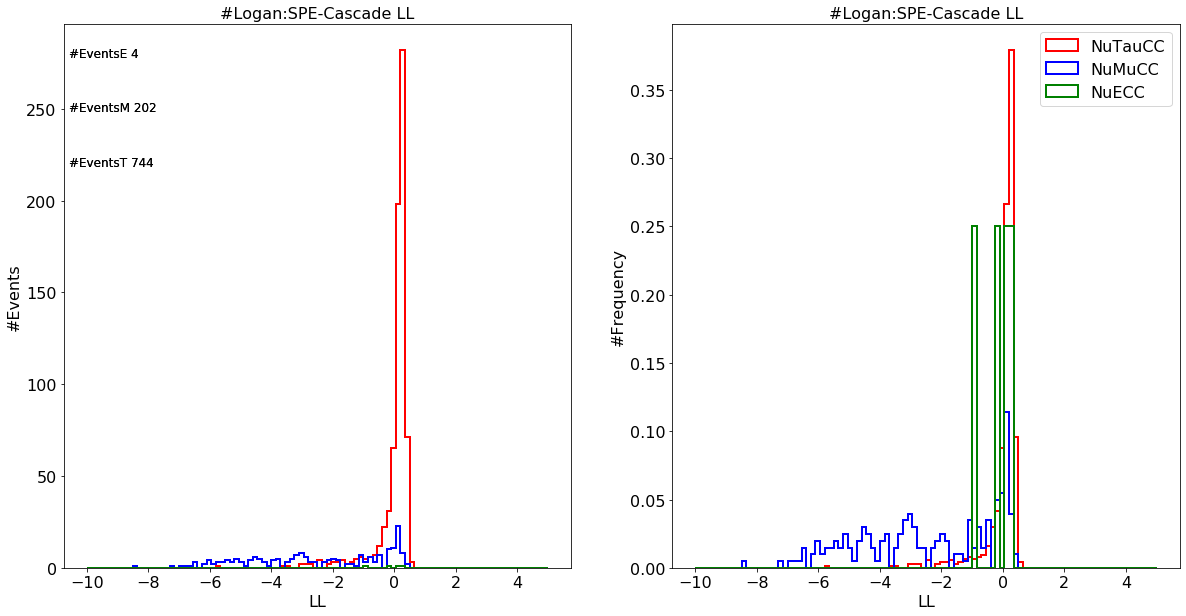

In [190]:
Plot("#Logan:SPE LL","LL",data_t['logan_veto']['SPE_rlogl'],data_m['logan_veto']['SPE_rlogl'],data_e['logan_veto']['SPE_rlogl'],r=[5,15])
Plot("#Logan:SPE LL","LL",data_t[mask_t]['logan_veto']['SPE_rlogl'],data_m[mask_m]['logan_veto']['SPE_rlogl'],data_e[mask_e]['logan_veto']['SPE_rlogl'],r=[5,15])
Plot("#Logan:Cascade LL","LL",data_t['logan_veto']['Cascade_rlogl'],data_m['logan_veto']['Cascade_rlogl'],data_e['logan_veto']['Cascade_rlogl'],r=[5,15])
Plot("#Logan:Cascade LL","LL",data_t[mask_t]['logan_veto']['Cascade_rlogl'],data_m[mask_m]['logan_veto']['Cascade_rlogl'],data_e[mask_e]['logan_veto']['Cascade_rlogl'],r=[5,15])
Plot("#Logan:SPE-Cascade LL","LL",data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'],data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'],data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL","LL",data_t[mask_t]['logan_veto']['SPE_rlogl']-data_t[mask_t]['logan_veto']['Cascade_rlogl'],data_m[mask_m]['logan_veto']['SPE_rlogl']-data_m[mask_m]['logan_veto']['Cascade_rlogl'],data_e[mask_e]['logan_veto']['SPE_rlogl']-data_e[mask_e]['logan_veto']['Cascade_rlogl'],r=[-10,5])

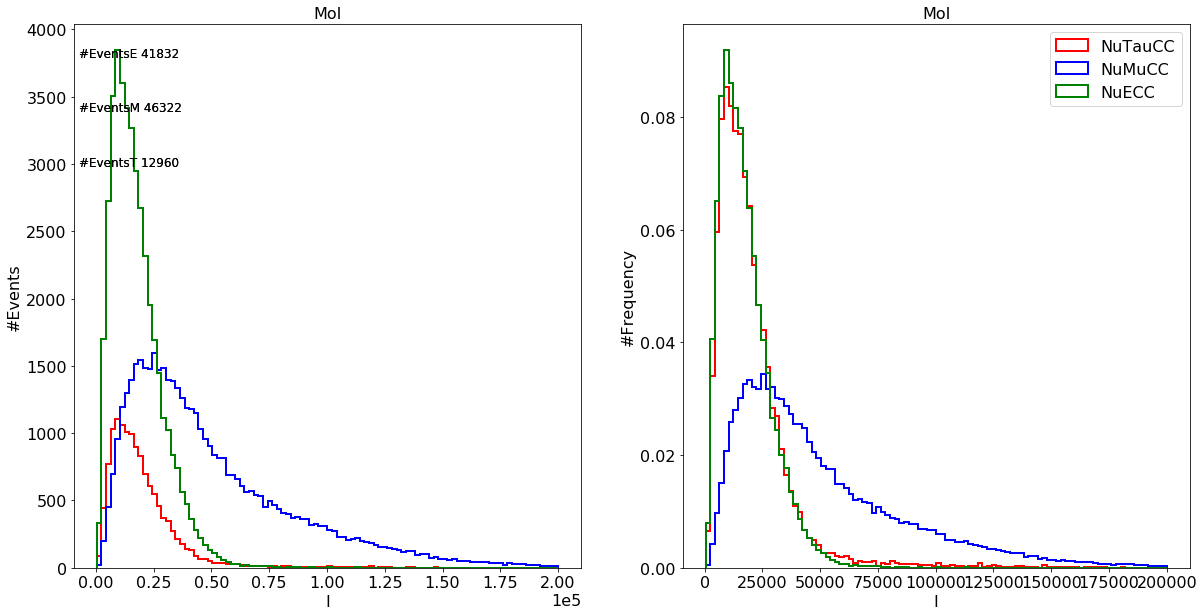

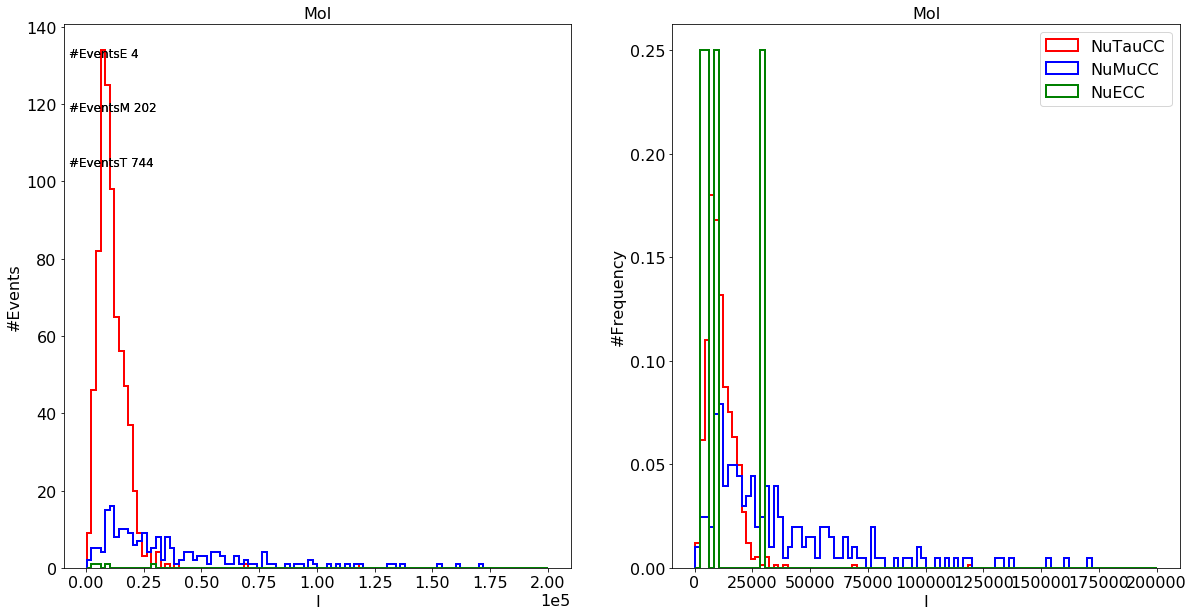

In [179]:
Plot("MoI","I",data_t['moi']/data_t['qtot'],data_m['moi']/data_m['qtot'],data_e['moi']/data_e['qtot'],r=[400,200000])
Plot("MoI","I",data_t[mask_t]['moi']/data_t[mask_t]['qtot'],data_m[mask_m]['moi']/data_m[mask_m]['qtot'],data_e[mask_e]['moi']/data_e[mask_e]['qtot'],r=[400,200000])

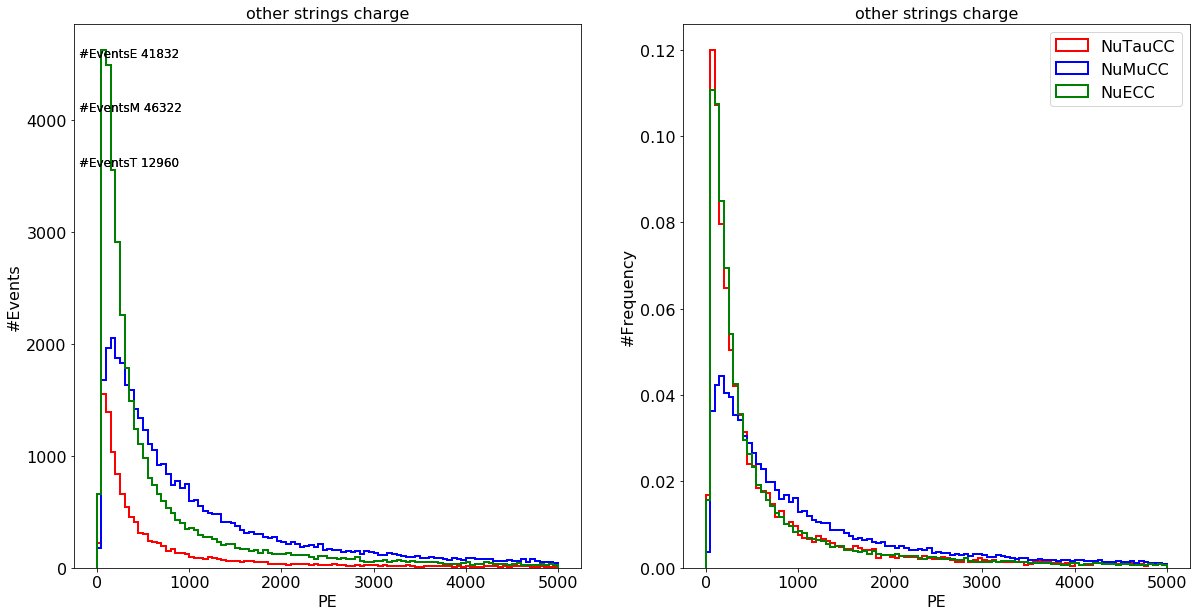

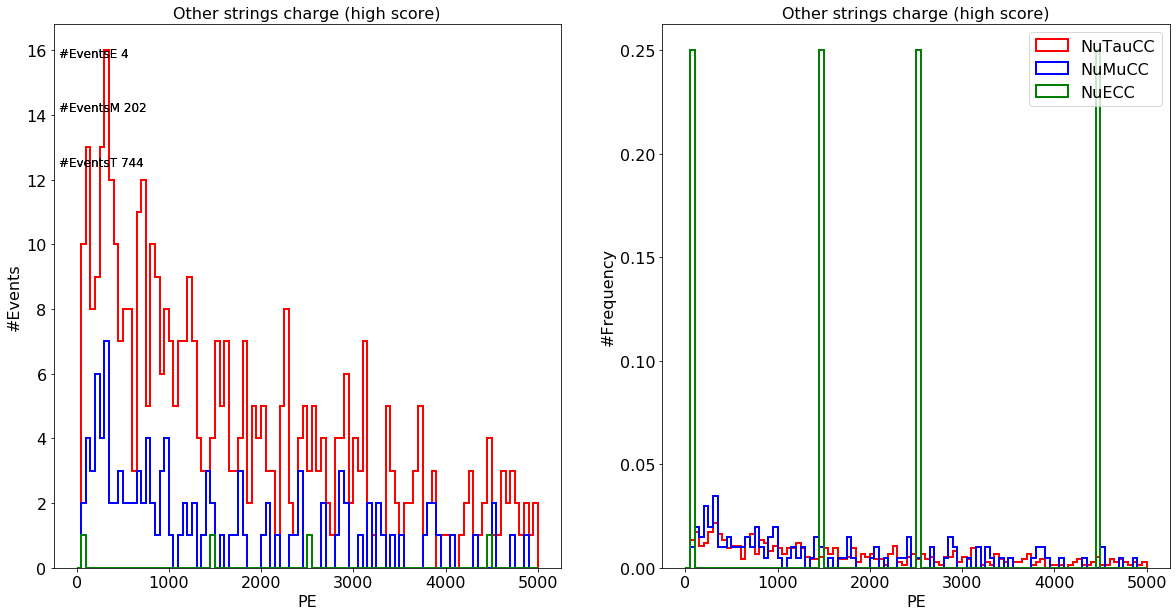

In [180]:
Plot("other strings charge","PE",data_t['qoth'],data_m['qoth'],data_e['qoth'],r=[0,5000])
Plot("Other strings charge (high score)","PE",data_t[mask_t]['qoth'],data_m[mask_m]['qoth'],data_e[mask_e]['qoth'],r=[0,5000])

In [181]:
dist_t = np.array([sum(np.sqrt(i)) for i in data_t['qst_all']['dist']])
dist_m = np.array([sum(np.sqrt(i)) for i in data_m['qst_all']['dist']])
dist_e = np.array([sum(np.sqrt(i)) for i in data_e['qst_all']['dist']])

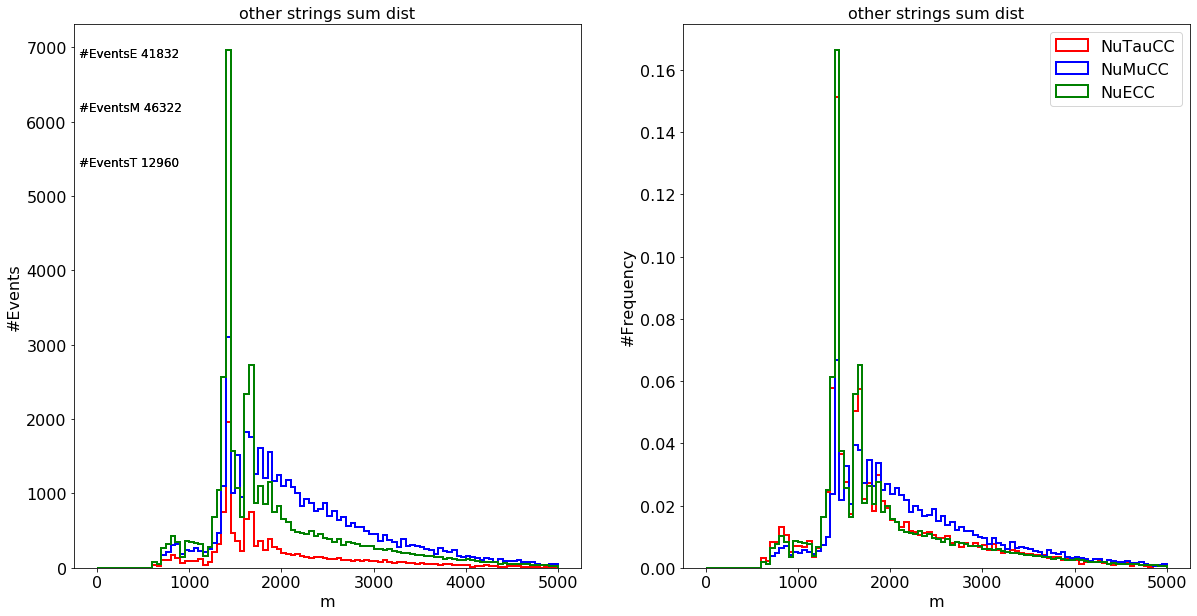

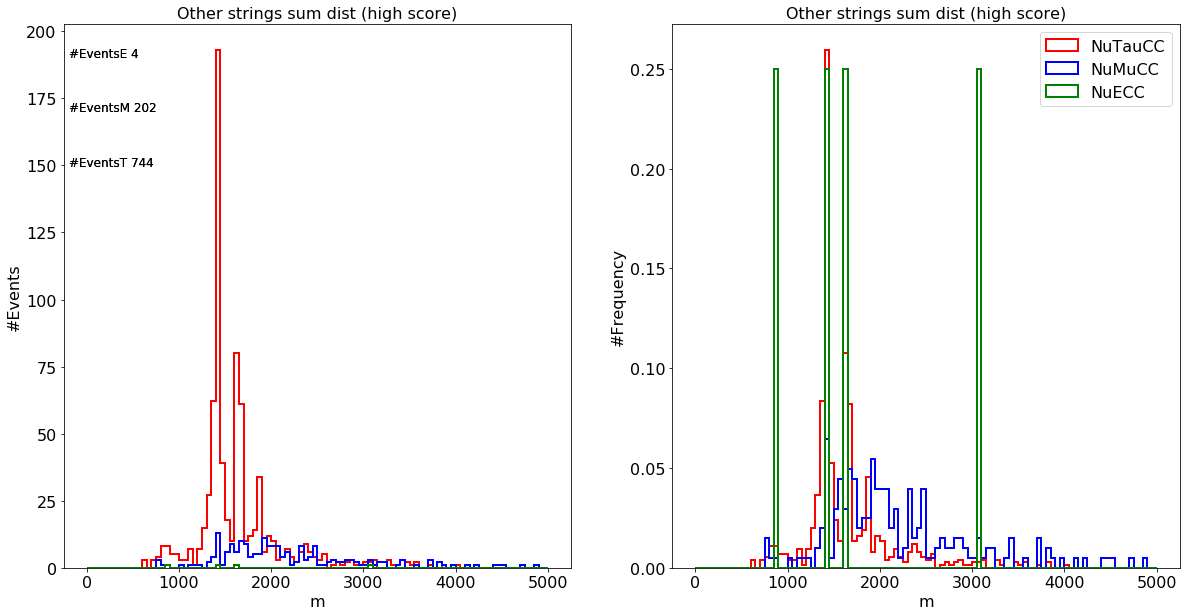

In [187]:
Plot("other strings sum dist","m",dist_t,dist_m,dist_e,r=[0,5000])
Plot("Other strings sum dist (high score)","m",dist_t[mask_t],dist_m[mask_m],dist_e[mask_e],r=[0,5000])

In [22]:
def OtherStCharge(data):
    output = []
    for e in data:
        set1 = set(e['qst_all']['q'])
        set2 = set(e['qst']['q'])
        qmax = e['qst']['q'][0]
        qmax_od = sorted(list(set1.difference(set2)),reverse=True)[0]
        qmax_ou = sorted(list(set1.union(set2)),reverse=True)[1]
        imax_od=np.where(e['qst_all']['q']==qmax_od)[0][0]
        dmax_od = np.sqrt(e['qst_all']['dist'][imax_od])
        imax_ou=np.where(e['qst_all']['q']==qmax_ou)[0][0]
        dmax_ou = np.sqrt(e['qst_all']['dist'][imax_ou])
        output.append([qmax,qmax_od/qmax,qmax_ou/qmax,dmax_od,dmax_ou])
    output = np.array(output)
    return output

In [23]:
vars_t = OtherStCharge(data_t)
vars_m = OtherStCharge(data_m)
vars_e = OtherStCharge(data_e)

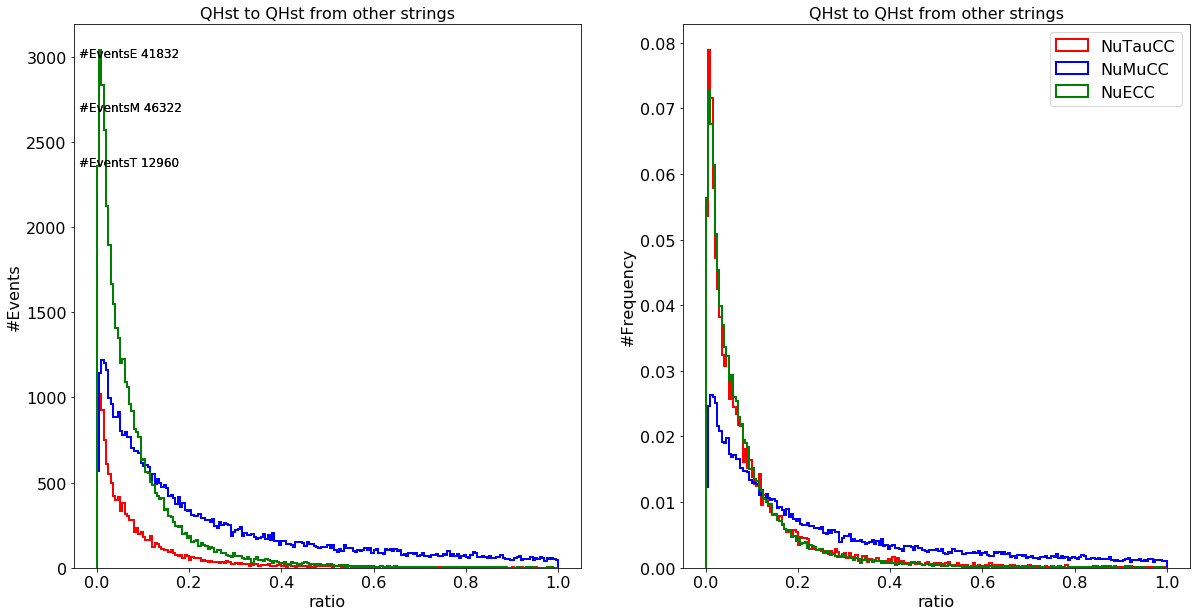

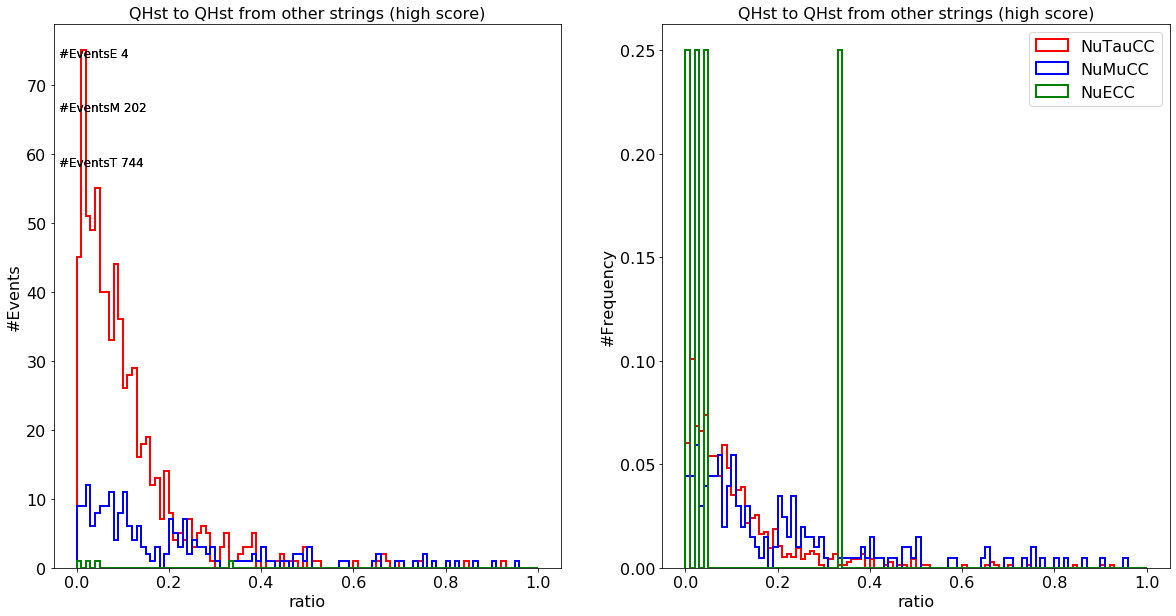

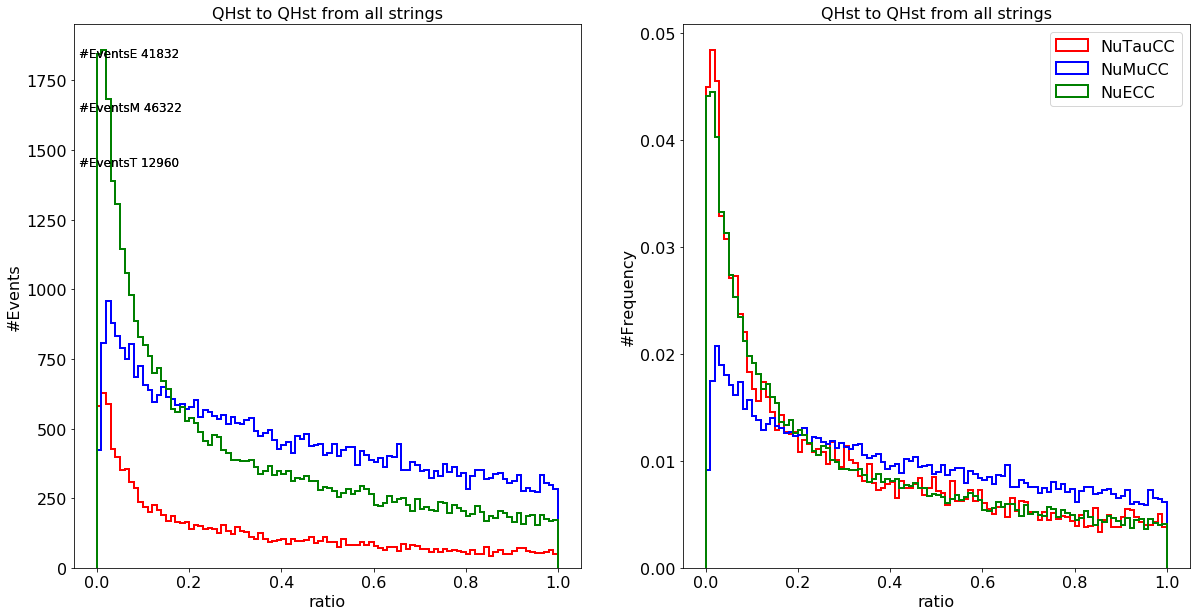

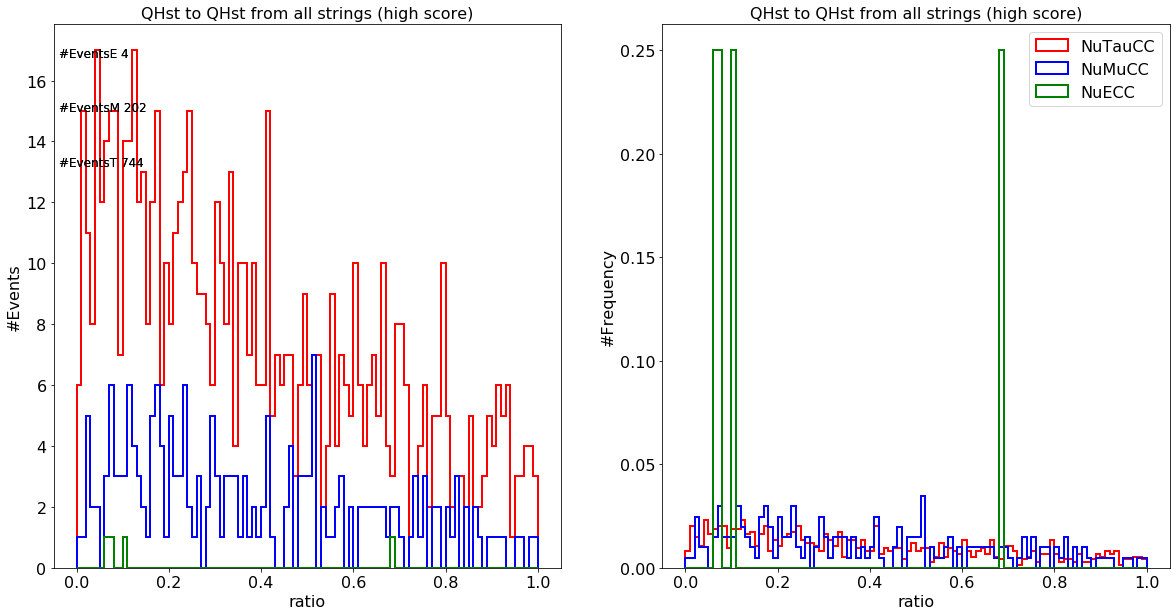

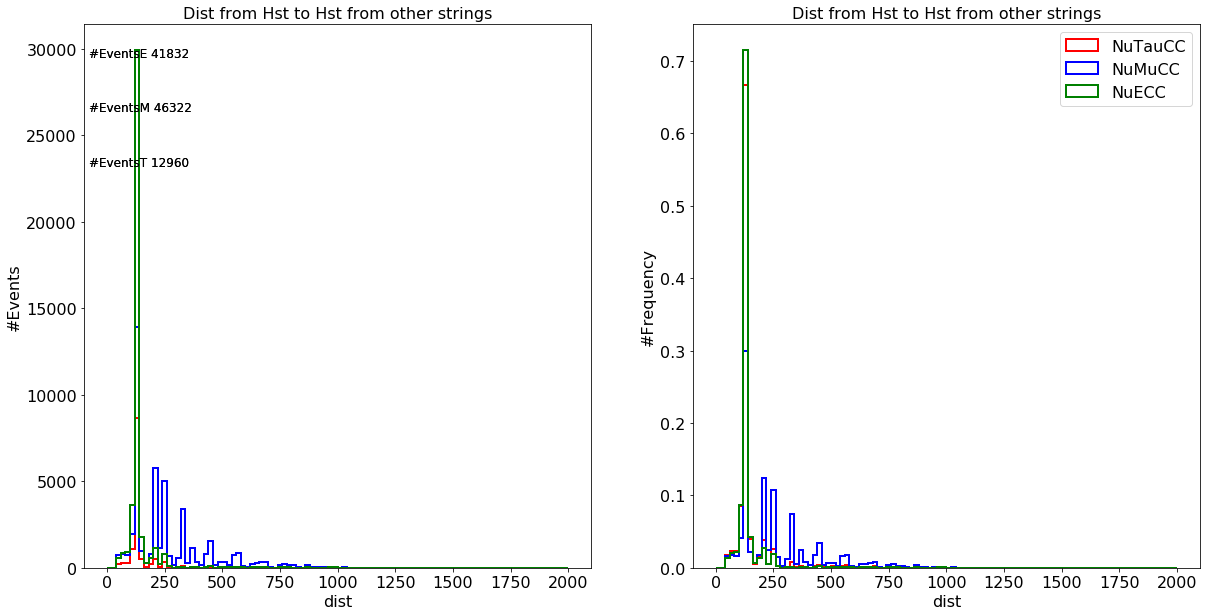

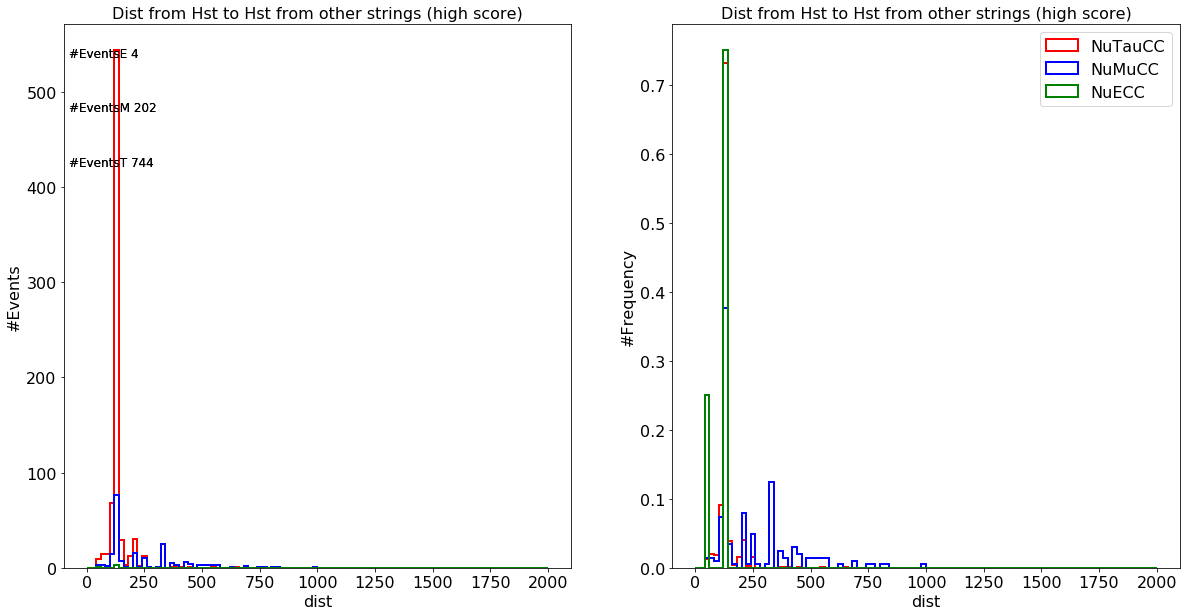

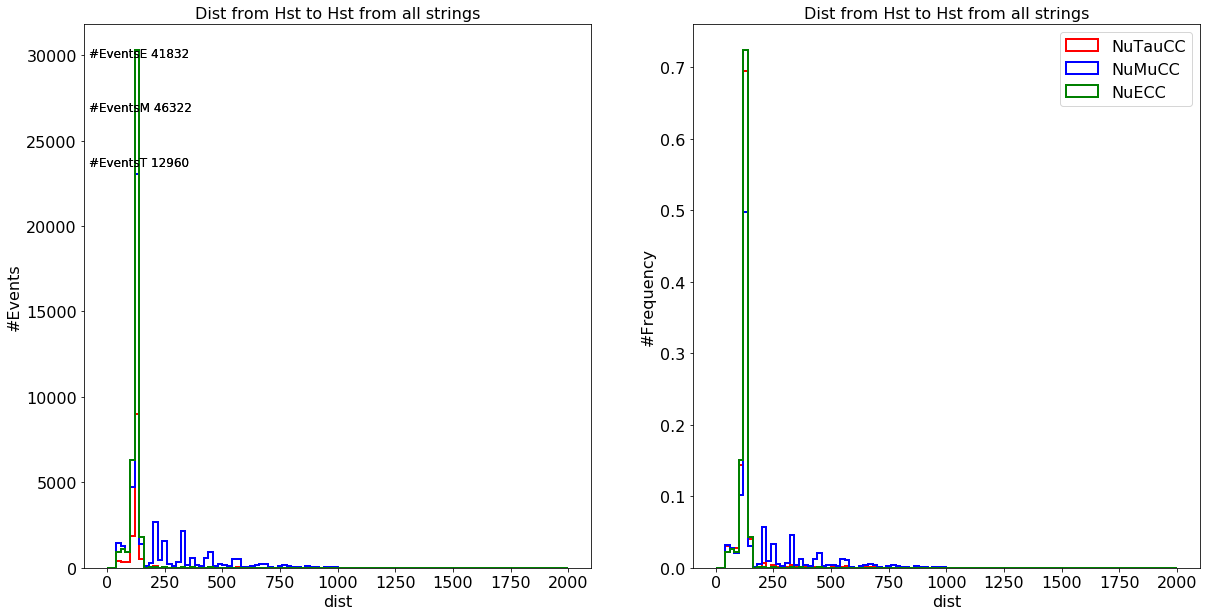

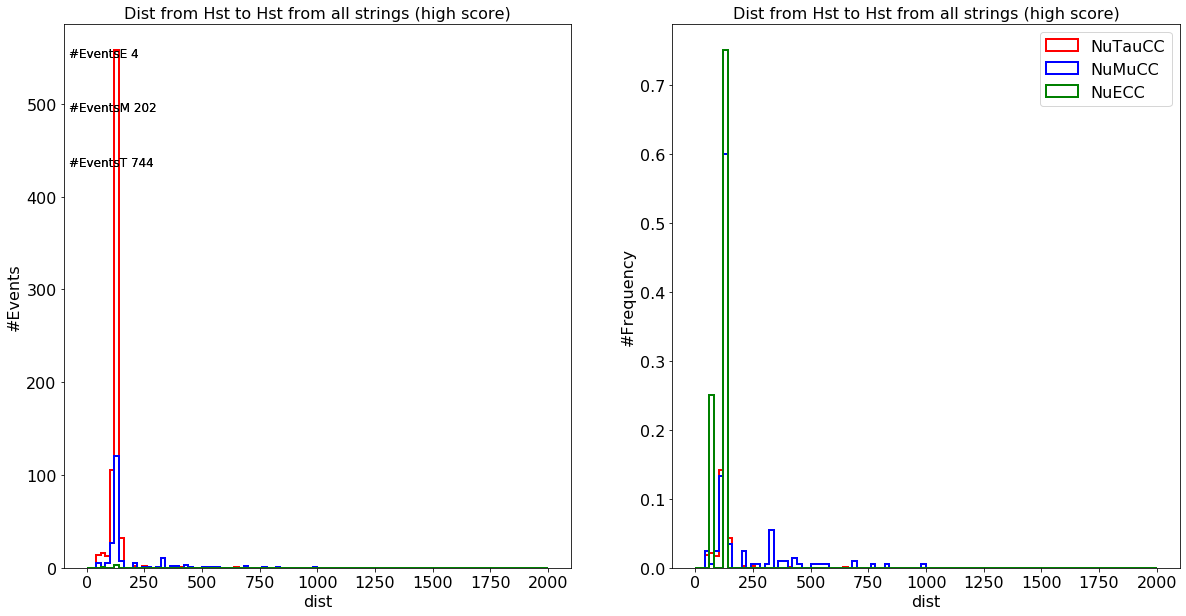

In [33]:
Plot("QHst to QHst from other strings","ratio",vars_t[:,1],vars_m[:,1],vars_e[:,1],r=[0,1],b=200)
Plot("QHst to QHst from other strings (high score)","ratio",vars_t[:,1][mask_t],vars_m[:,1][mask_m],vars_e[:,1][mask_e],r=[0,1])
Plot("QHst to QHst from all strings","ratio",vars_t[:,2],vars_m[:,2],vars_e[:,2],r=[0,1])
Plot("QHst to QHst from all strings (high score)","ratio",vars_t[:,2][mask_t],vars_m[:,2][mask_m],vars_e[:,2][mask_e],r=[0,1])
Plot("Dist from Hst to Hst from other strings","dist",vars_t[:,3],vars_m[:,3],vars_e[:,3],r=[0,2000])
Plot("Dist from Hst to Hst from other strings (high score)","dist",vars_t[:,3][mask_t],vars_m[:,3][mask_m],vars_e[:,3][mask_e],r=[0,2000])
Plot("Dist from Hst to Hst from all strings","dist",vars_t[:,4],vars_m[:,4],vars_e[:,4],r=[0,2000])
Plot("Dist from Hst to Hst from all strings (high score)","dist",vars_t[:,4][mask_t],vars_m[:,4][mask_m],vars_e[:,4][mask_e],r=[0,2000])


In [201]:
print(data_t['ti'][0])

[9.8405283e+03 1.8114673e-01 2.1318301e+04 2.3164695e+04]


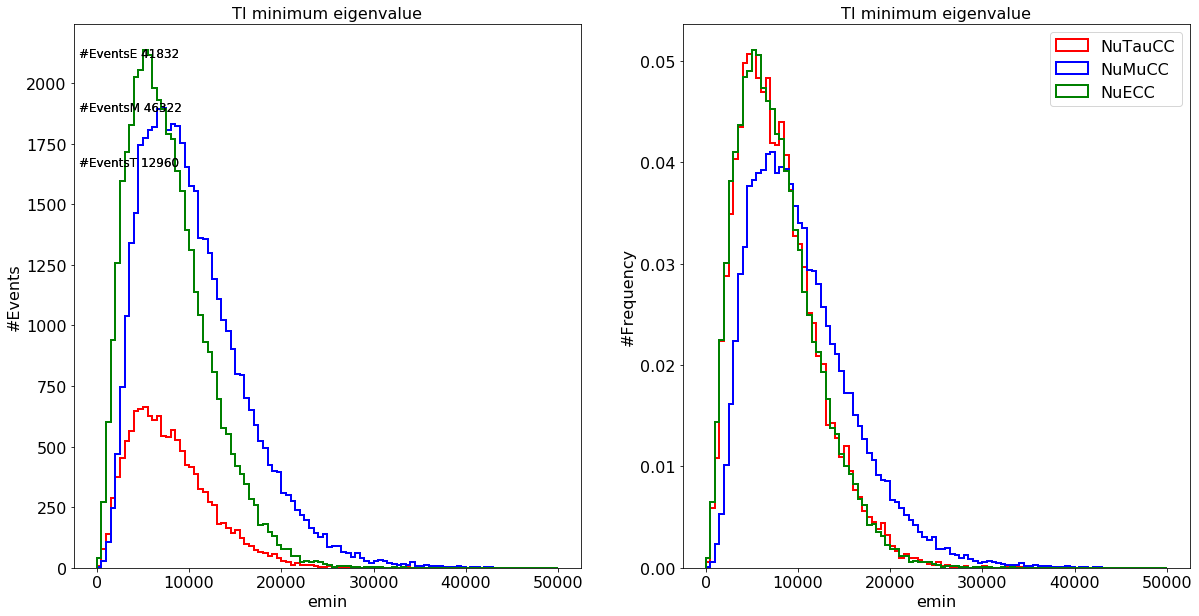

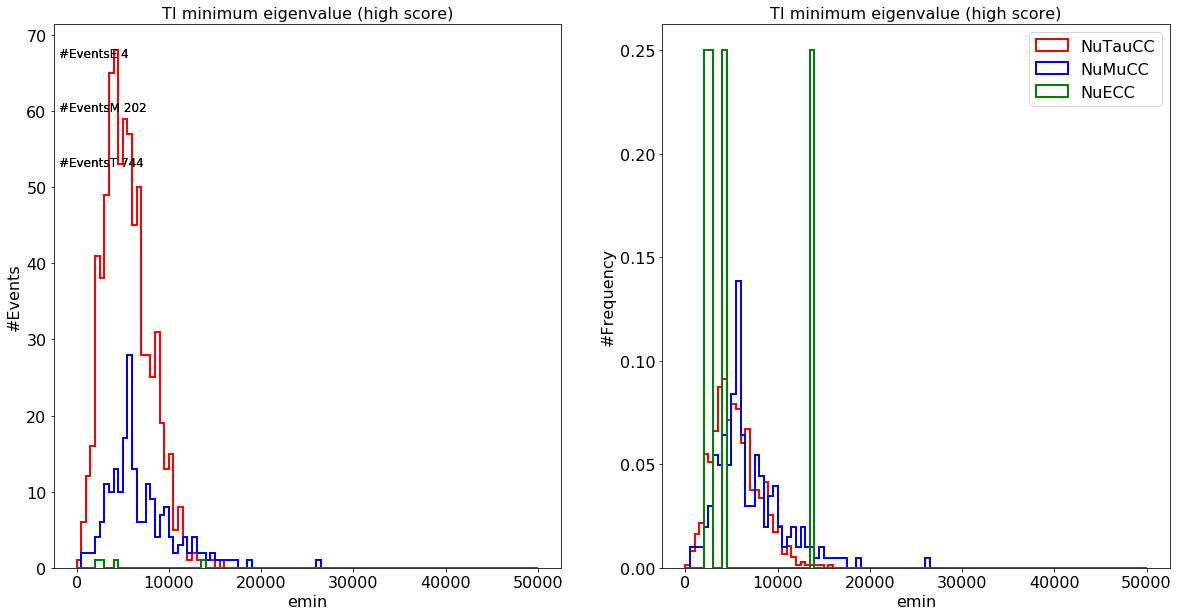

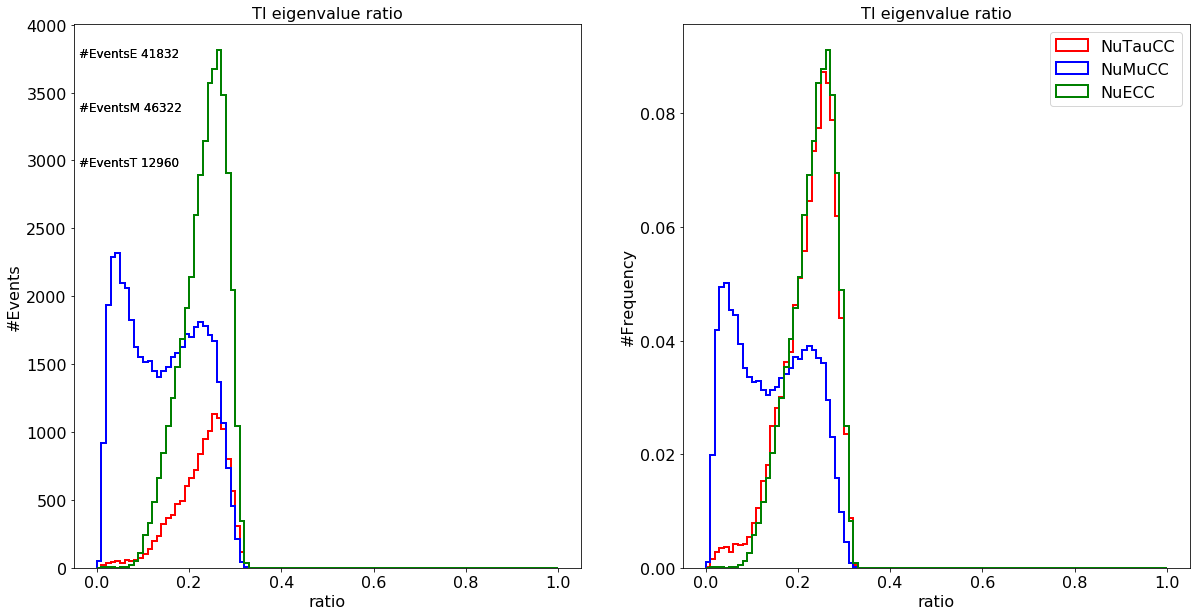

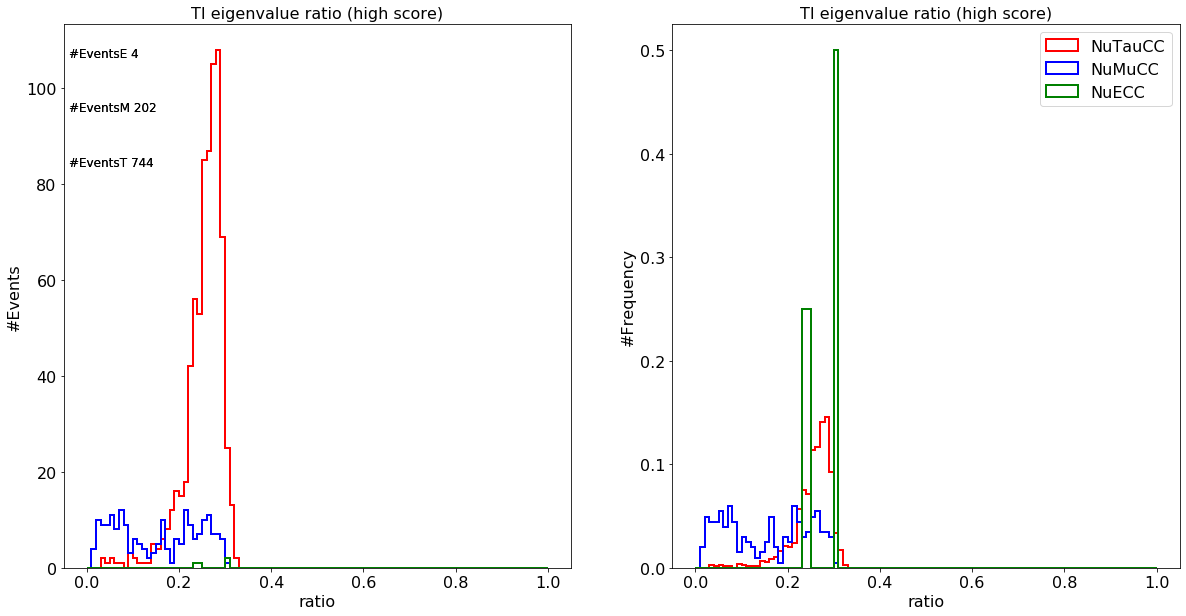

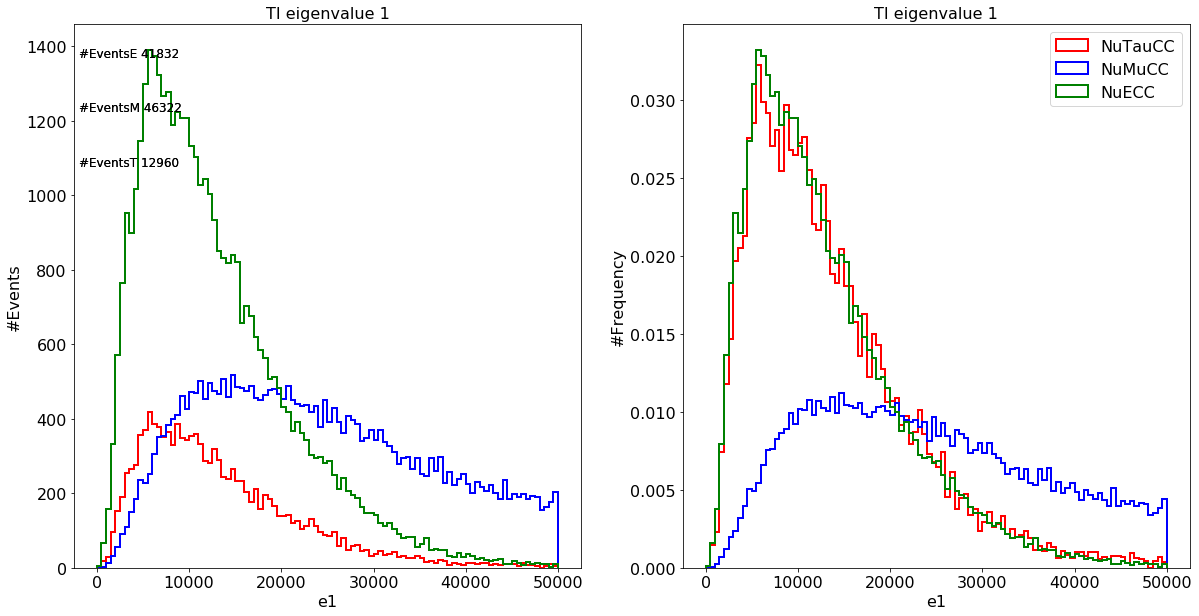

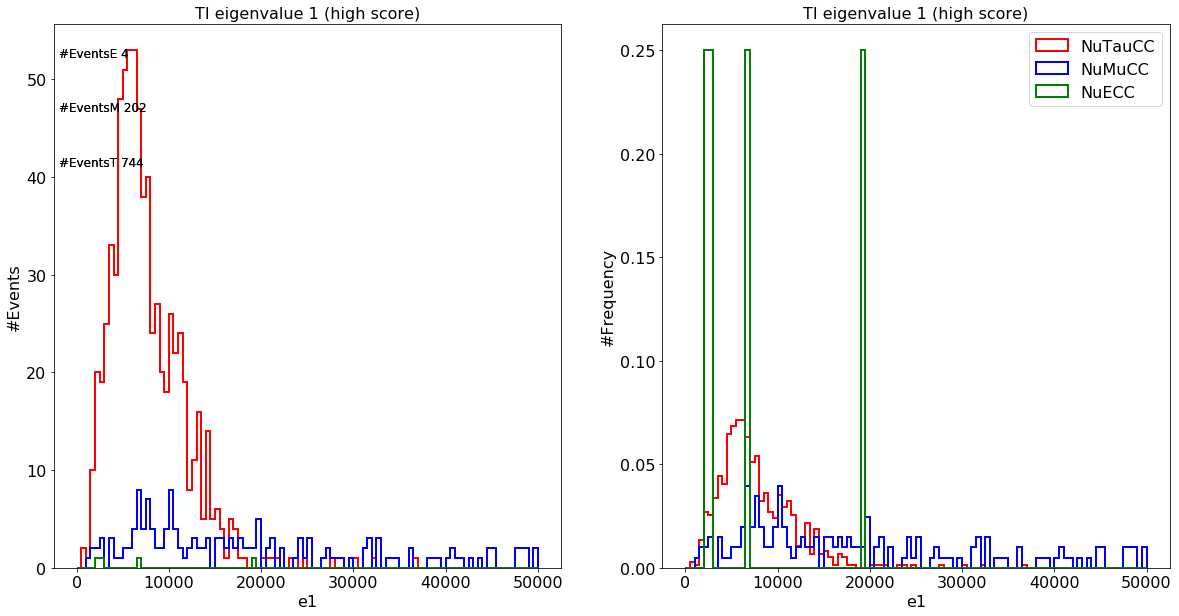

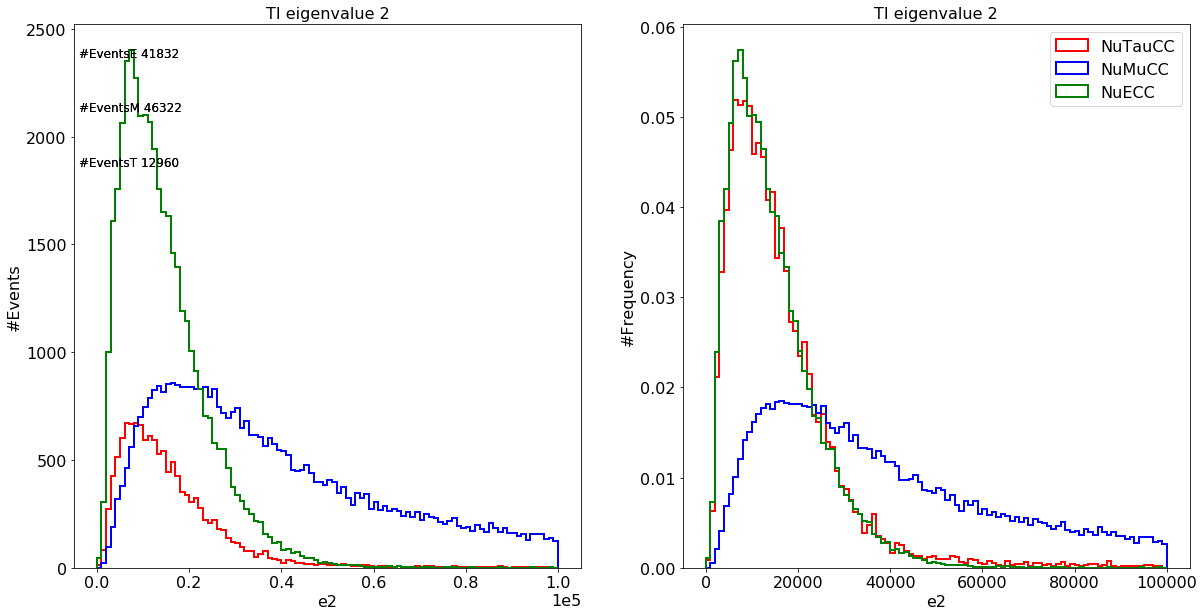

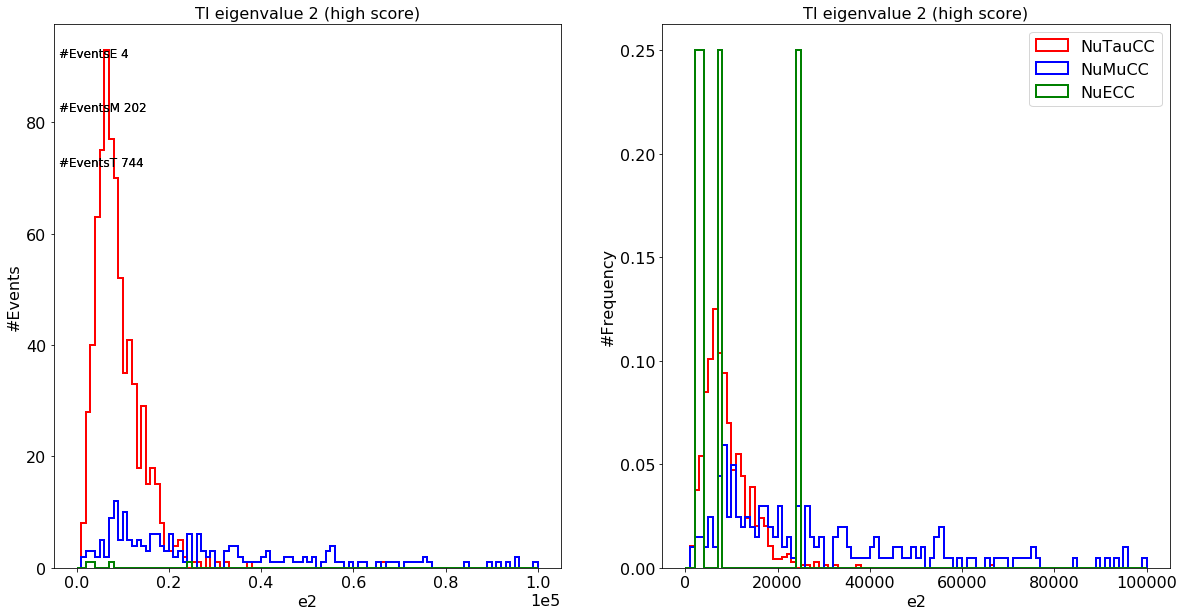

In [25]:
Plot("TI minimum eigenvalue","emin",data_t['ti'][:,0],data_m['ti'][:,0],data_e['ti'][:,0],r=[0,50000])
Plot("TI minimum eigenvalue (high score)","emin",data_t['ti'][:,0][mask_t],data_m['ti'][:,0][mask_m],data_e['ti'][:,0][mask_e],r=[0,50000])
Plot("TI eigenvalue ratio","ratio",data_t['ti'][:,1],data_m['ti'][:,1],data_e['ti'][:,1],r=[0,1])
Plot("TI eigenvalue ratio (high score)","ratio",data_t['ti'][:,1][mask_t],data_m['ti'][:,1][mask_m],data_e['ti'][:,1][mask_e],r=[0,1])
Plot("TI eigenvalue 1","e1",data_t['ti'][:,2],data_m['ti'][:,2],data_e['ti'][:,2],r=[0,50000])
Plot("TI eigenvalue 1 (high score)","e1",data_t['ti'][:,2][mask_t],data_m['ti'][:,2][mask_m],data_e['ti'][:,2][mask_e],r=[0,50000])
Plot("TI eigenvalue 2","e2",data_t['ti'][:,3],data_m['ti'][:,3],data_e['ti'][:,3],r=[0,100000])
Plot("TI eigenvalue 2 (high score)","e2",data_t['ti'][:,3][mask_t],data_m['ti'][:,3][mask_m],data_e['ti'][:,3][mask_e],r=[0,100000])



In [39]:
def Corr(Name,label_x,label_y,x,y,c):
    fig = plt.figure(figsize=(10, 10),facecolor ='w')
    ax = fig.add_subplot()
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
   
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#Events '+str(len(x)), transform=ax.transAxes, color = "black",fontsize=12)
    
    ax.set_xlabel(label_x, fontsize = 16)                                                              
    ax.set_ylabel(label_y, fontsize = 16)                                                   
    ax.scatter(x,y, s=1,color = c)  
    plt.show()


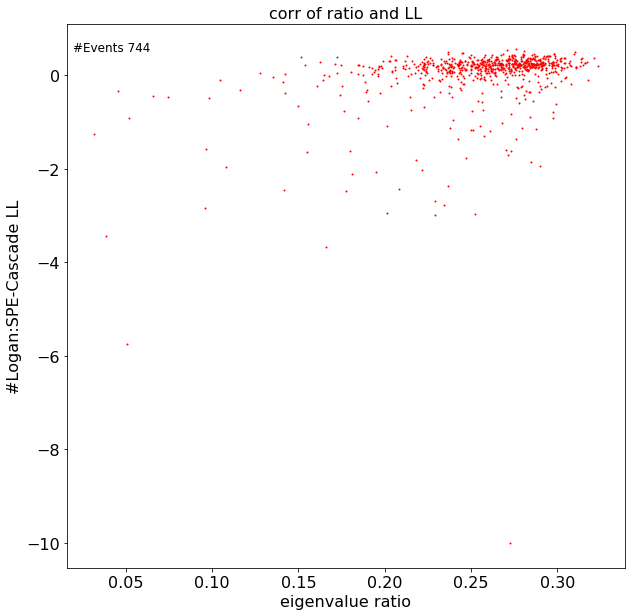

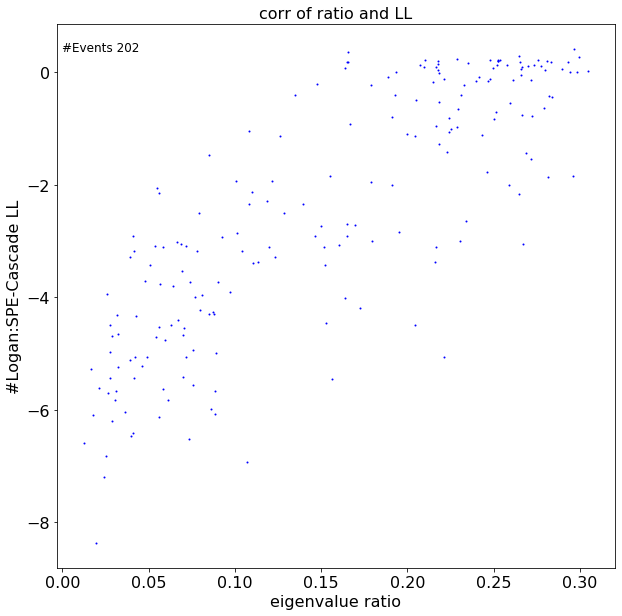

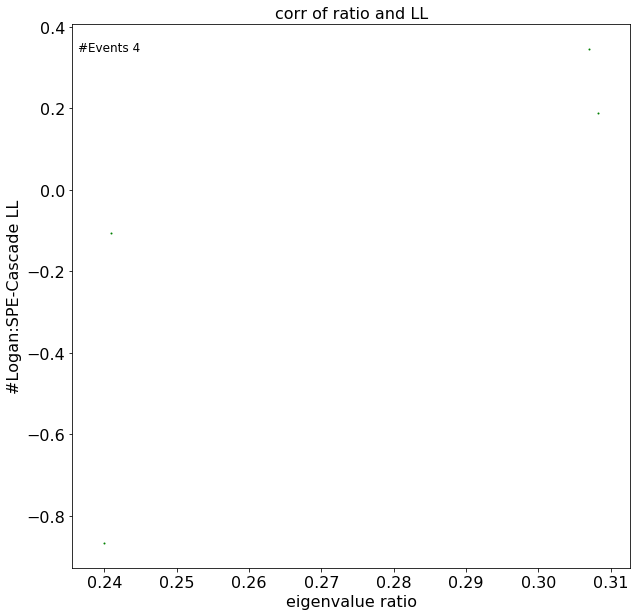

In [40]:
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_t['ti'][:,1][mask_t],np.clip(data_t['logan_veto']['SPE_rlogl'][mask_t]-data_t['logan_veto']['Cascade_rlogl'][mask_t],-10,5),"r")
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_m['ti'][:,1][mask_m],np.clip(data_m['logan_veto']['SPE_rlogl'][mask_m]-data_m['logan_veto']['Cascade_rlogl'][mask_m],-10,5),"b")
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_e['ti'][:,1][mask_e],np.clip(data_e['logan_veto']['SPE_rlogl'][mask_e]-data_e['logan_veto']['Cascade_rlogl'][mask_e],-10,5),"g")

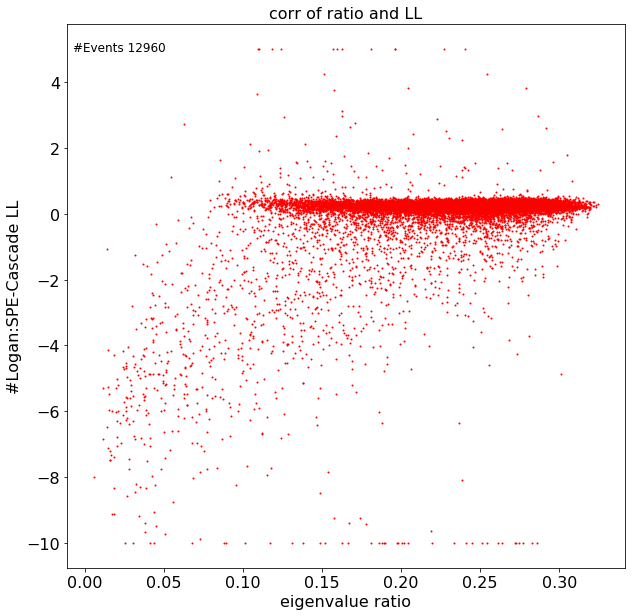

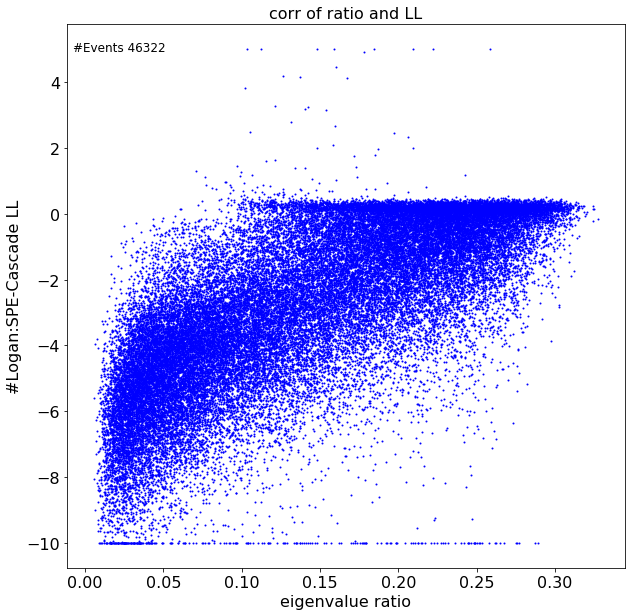

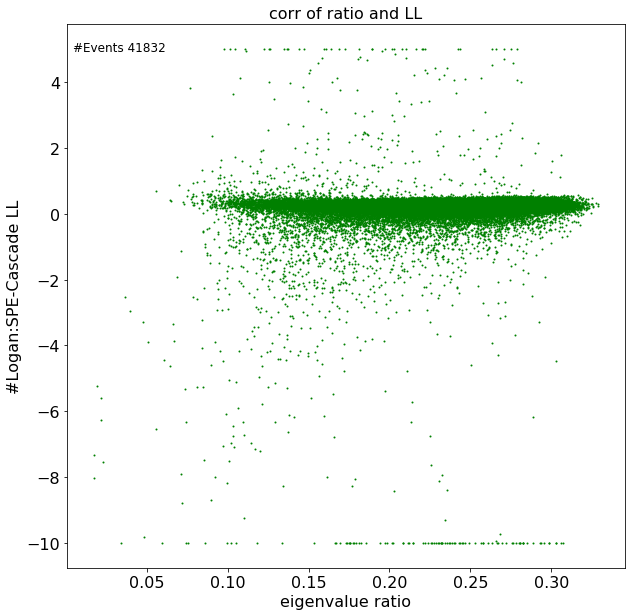

In [41]:
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_t['ti'][:,1],np.clip(data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'],-10,5),"r")
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_m['ti'][:,1],np.clip(data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'],-10,5),"b")
Corr("corr of ratio and LL","eigenvalue ratio","#Logan:SPE-Cascade LL",data_e['ti'][:,1],np.clip(data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'],-10,5),"g")

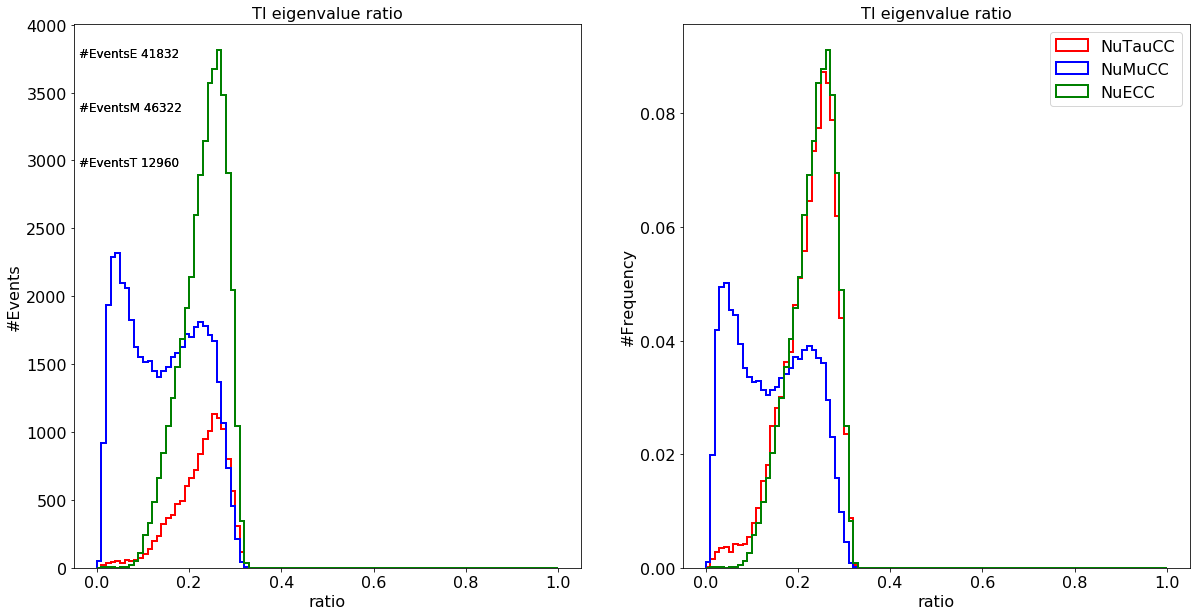

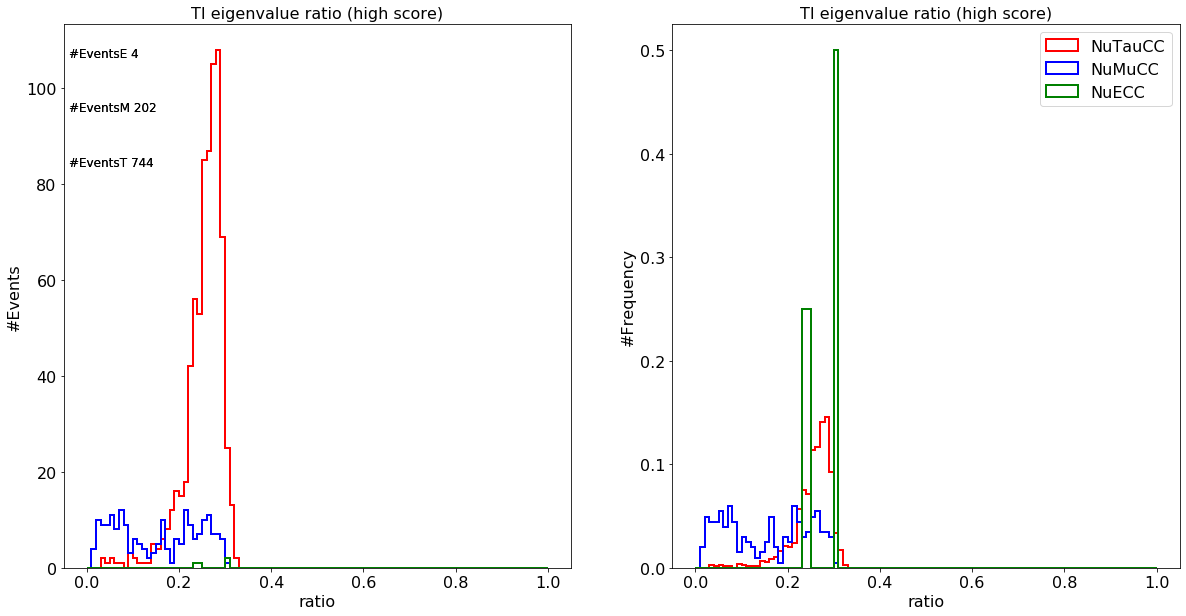

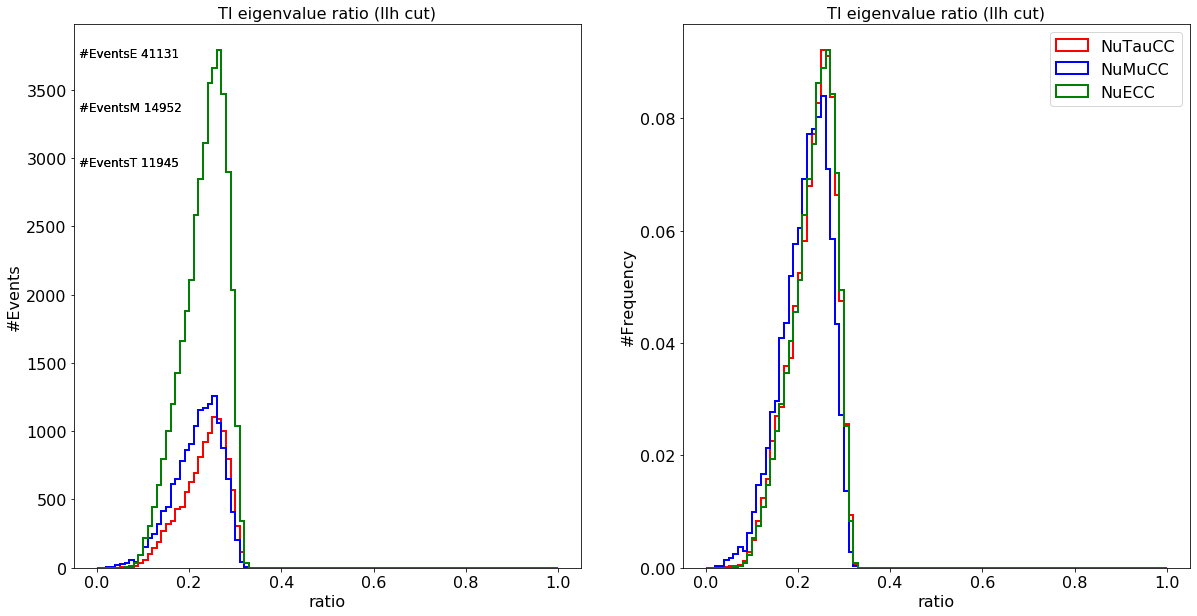

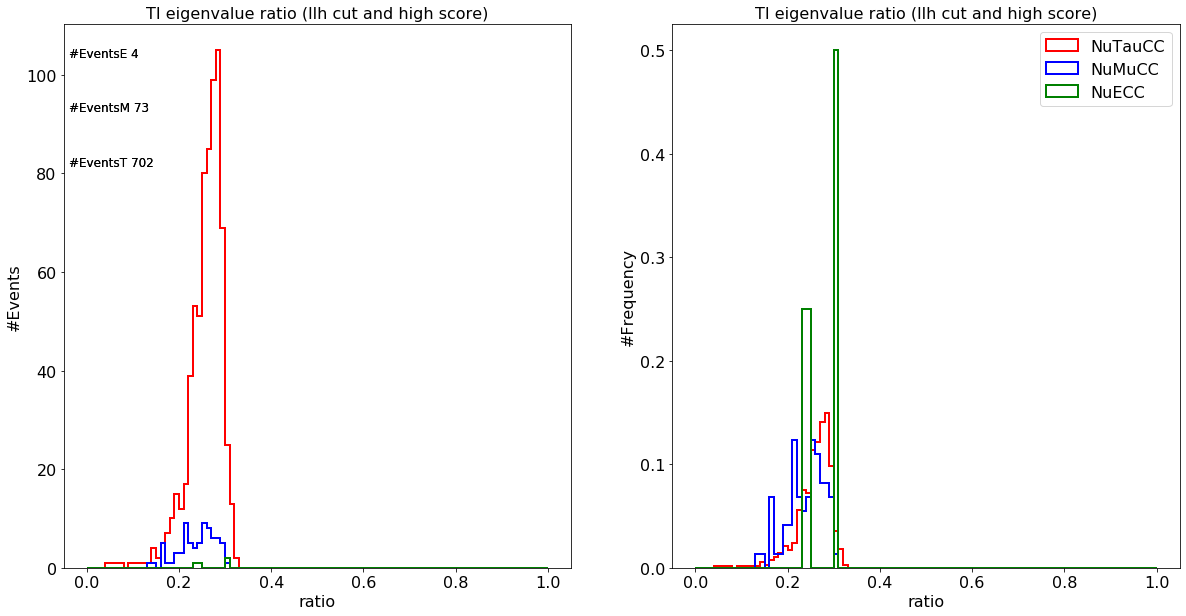

Rates after NET1 and NET3
NuTauCC = 0.379 +/- 0.026
NuMuCC =  0.114 +/- 0.021
NuECC =   0.005 +/- 0.004


In [60]:
Plot("TI eigenvalue ratio","ratio",data_t['ti'][:,1],data_m['ti'][:,1],data_e['ti'][:,1],r=[0,1])
Plot("TI eigenvalue ratio (high score)","ratio",data_t['ti'][:,1][mask_t],data_m['ti'][:,1][mask_m],data_e['ti'][:,1][mask_e],r=[0,1])
Plot("TI eigenvalue ratio (llh cut)","ratio",data_t['ti'][:,1][mask_lt],data_m['ti'][:,1][mask_lm],data_e['ti'][:,1][mask_le],r=[0,1])
Plot("TI eigenvalue ratio (llh cut and high score)","ratio",data_t['ti'][:,1][mask_lts],data_m['ti'][:,1][mask_lms],data_e['ti'][:,1][mask_les],r=[0,1])


In [54]:
print(sum(mask_rms),sum(mask_m))

107 202


/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


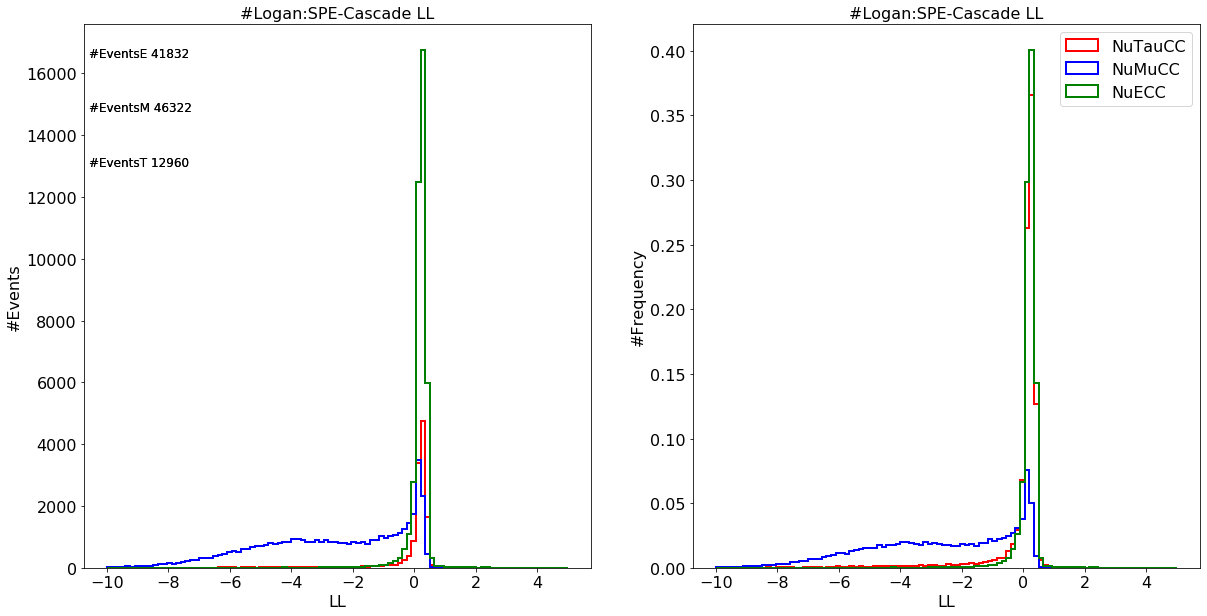

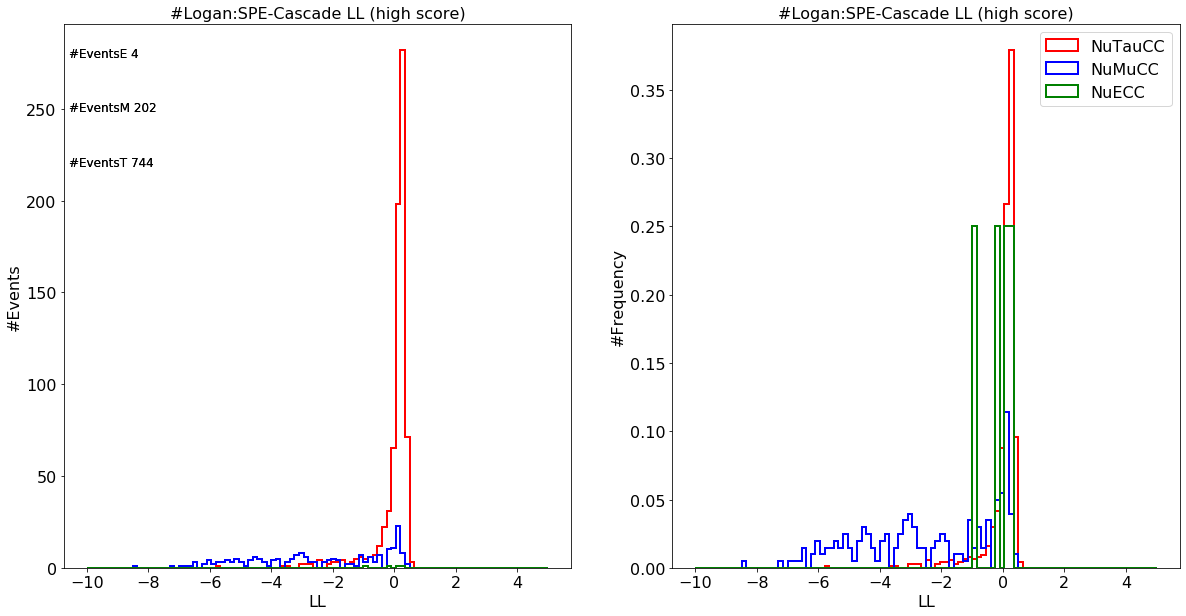

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


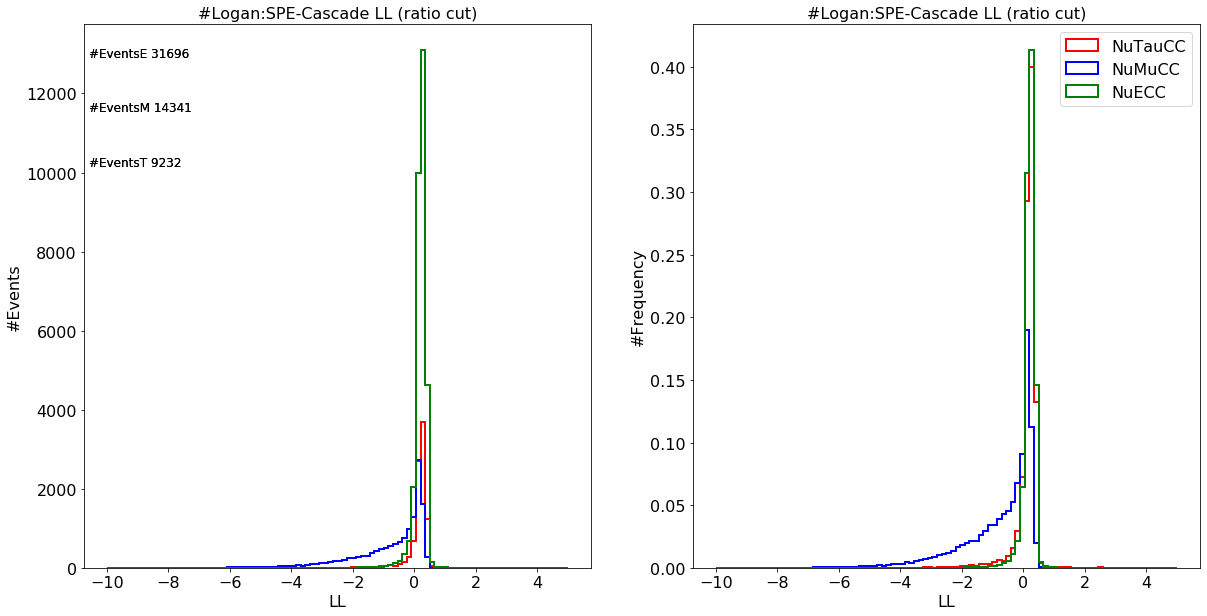

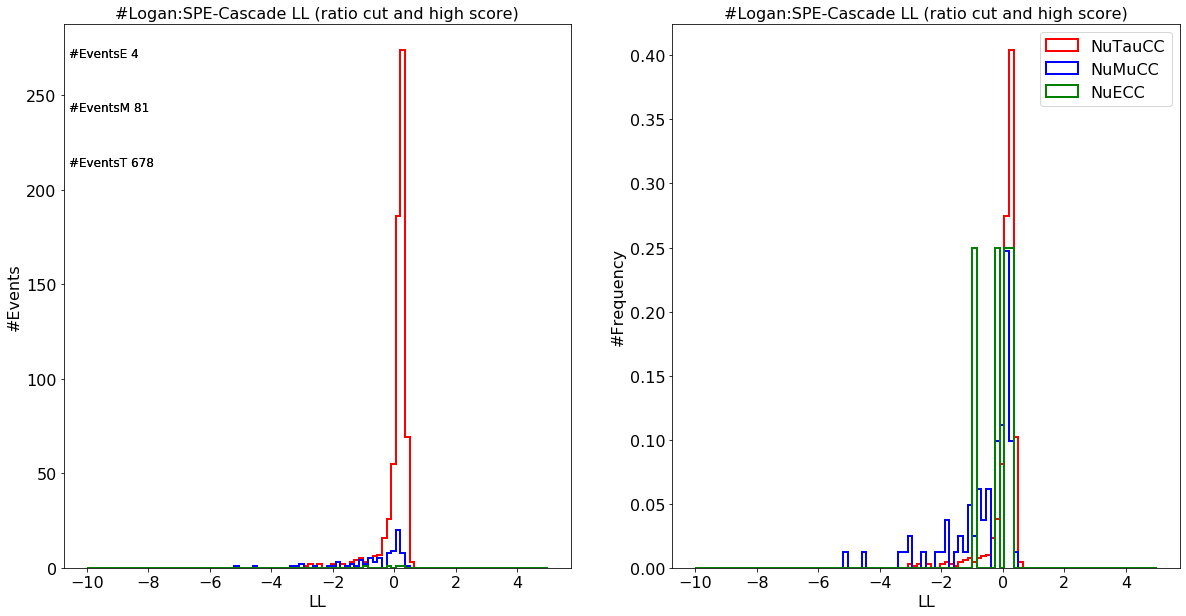

In [57]:
Plot("#Logan:SPE-Cascade LL","LL",data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'],data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'],data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL (high score)","LL",data_t[mask_t]['logan_veto']['SPE_rlogl']-data_t[mask_t]['logan_veto']['Cascade_rlogl'],data_m[mask_m]['logan_veto']['SPE_rlogl']-data_m[mask_m]['logan_veto']['Cascade_rlogl'],data_e[mask_e]['logan_veto']['SPE_rlogl']-data_e[mask_e]['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL (ratio cut)","LL",data_t[mask_rt]['logan_veto']['SPE_rlogl']-data_t[mask_rt]['logan_veto']['Cascade_rlogl'],data_m[mask_rm]['logan_veto']['SPE_rlogl']-data_m[mask_rm]['logan_veto']['Cascade_rlogl'],data_e[mask_re]['logan_veto']['SPE_rlogl']-data_e[mask_re]['logan_veto']['Cascade_rlogl'],r=[-10,5])
Plot("#Logan:SPE-Cascade LL (ratio cut and high score)","LL",data_t[mask_rts]['logan_veto']['SPE_rlogl']-data_t[mask_rts]['logan_veto']['Cascade_rlogl'],data_m[mask_rms]['logan_veto']['SPE_rlogl']-data_m[mask_rms]['logan_veto']['Cascade_rlogl'],data_e[mask_res]['logan_veto']['SPE_rlogl']-data_e[mask_res]['logan_veto']['Cascade_rlogl'],r=[-10,5])